In [1]:
import os
import pywt
import numpy as np
import pandas as pd
import seaborn as sns 
import scipy.io as sio
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import detrend
from scipy.fft import fft, fftfreq
from scipy.signal import welch as welch
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import ttest_ind, shapiro, ttest_rel, wilcoxon

# Introducción

En el análisis de señales fisiológicas, como las señales de electrocardiograma (ECG), el preprocesamiento de datos es una etapa fundamental para mejorar la calidad de la señal y asegurar una interpretación precisa de las características relevantes para el diagnóstico [6]. Este trabajo se centra en la evaluación y comparación de diferentes técnicas de filtrado y procesamiento de señales para analizar su impacto en la estimación de un parámetro específico denominado fMP, el cual es relevante en la caracterización de la actividad cardíaca. El objetivo es evaluar en qué medida estas técnicas influyen en los valores finales de fMP y cómo este efecto puede variar entre distintos grupos de pacientes.

Para llevar a cabo este análisis, se emplearon dos conjuntos de datos derivados de la misma señal original de ECG. El primer conjunto (fMP hallados en el proyecto 2) representa una versión de las señales previamente procesadas (las señales originales ya estan procesadas). En contraste, el segundo conjunto (fMP hallados en el proyecto 3) contiene señales sin procesar previamente por lo que se debe utilizar métodos de filtrado con parámetros amplios y técnicas adicionales de eliminación de ruido, con el objetivo de limpiar la señal de ruido de alta y baja frecuencia que pueden interferir con la precisión de la medición [6]. Ambos conjuntos contienen datos de pacientes diagnosticados con fibrilación auricular (AFIB) y bradicardia sinusal (SB), permitiendo realizar una comparación detallada entre las dos técnicas de procesamiento según el tipo de paciente.

Para evaluar la consistencia y comparabilidad de los valores de fMP entre ambos conjuntos de datos, se utilizaron tanto métodos de estadística descriptiva como pruebas de hipótesis. Se calcularon medidas como la media, la desviación estándar y los percentiles para caracterizar la distribución de fMP en cada conjunto. Además, se llevaron a cabo pruebas estadísticas (como la prueba de Shapiro-Wilk para normalidad y la prueba de Wilcoxon para comparaciones no paramétricas) para determinar si las diferencias observadas entre los dos métodos de procesamiento eran estadísticamente significativas [14].

Los resultados fueron complementados con análisis visuales, incluyendo histogramas y diagramas de caja y bigotes, para ilustrar de forma gráfica las variaciones en fMP que resultan de cada método de filtrado. Esto permitió observar cómo las técnicas de eliminación de ruido afectan los valores de fMP y si estas variaciones podrían introducir un sesgo en la interpretación clínica de la señal. En particular, se exploró si el filtrado en el proyecto 3 tiende a sobreestimar ciertos valores en comparación con el proyecto 2, lo cual podría estar relacionado con una amplificación no deseada de ciertas frecuencias en la señal.

La comparación detallada de los dos métodos de procesamiento aplicados a fMP ofrece una base para entender cómo distintas elecciones de parámetros pueden afectar los resultados y la interpretación clínica. Los hallazgos de este estudio destacan la necesidad de optimizar las técnicas de filtrado para asegurar la precisión en el análisis de señales ECG, especialmente en estudios que buscan diferenciar entre condiciones cardíacas como la fibrilación auricular y la bradicardia sinusal.

# Metodología

En primer lugar, se realizó la extracción de los datos de la base de datos [0]. A continuación, se aplicó una función de filtro wavelet sin modificaciones, con el objetivo de observar gráficamente la señal original en comparación con la misma señal tras ser filtrada. Esta visualización preliminar permitió analizar el efecto del filtro wavelet en las señales sin realizar aún ajustes en sus parámetros específicos. Después de la extracción general de datos, se seleccionaron las señales de interés, específicamente las derivaciones II de los registros de ECG correspondientes a pacientes con patologías de fibrilación auricular (AFIB) y bradicardia sinusal (SB). Estas señales se agruparon en diccionarios denominados AFIB_values y SB_values, lo que facilitó su manejo y procesamiento en etapas posteriores. A partir de los diccionarios de señales AFIB_values y SB_values, se seleccionaron cinco muestras de cada conjunto (10 muestras en total) para someterlas a tres flujos de procesamiento de señales distintos. Esta selección de muestras permitió una comparación controlada de los diferentes flujos para identificar el más eficaz en términos de calidad y fidelidad de la señal.

Se definieron y evaluaron tres flujos de procesamiento de señales. El Flujo 1 incluyó un filtro pasa-altas de tipo IIR con una frecuencia de corte de 0.5 Hz para eliminar componentes de muy baja frecuencia, seguido de un filtro wavelet modificado basado en Daubechies para reducir ruidos específicos preservando la estructura de la señal, y finalmente, un filtro pasa-bajas de 50 Hz para eliminar el ruido electromagnético de alta frecuencia. El Flujo 2 consistió en una rutina de detrend para eliminar tendencias de baja frecuencia en la línea de base, seguida del mismo filtro wavelet modificado y un filtro pasa-bajas de 50 Hz. El Flujo 3 empleó un filtro pasa-altas IIR de 0.5 Hz y un filtro pasa-bajas de 50 Hz. Tras evaluar los tres flujos, se seleccionó el Flujo 2 como el más adecuado, ya que ofreció señales filtradas de mejor calidad y una menor distorsión en la morfología de la señal de interés. La combinación del detrend y el filtro wavelet modificado proporcionó una señal más clara, con menor presencia de ruido sin comprometer las características principales de la señal y permitiendo diferenciar las diferentes componentes el ECG.

Con el Flujo 2 seleccionado como el más efectivo, se procedió a aplicarlo a todas las señales extraídas en los diccionarios AFIB_values y SB_values. Este flujo fue aplicado a cada señal en un proceso secuencial que incluyó el detrend, el filtrado wavelet modificado y el filtro pasa-bajas de 50 Hz. Para cada señal procesada con el Flujo 2, se calculó la frecuencia de máxima potencia (fMP) usando el periodograma de Welch. Esta métrica permite identificar la frecuencia dominante en cada señal procesada, proporcionando información sobre las características predominantes en las señales de ECG de los pacientes con AFIB y SB. La fMP se utilizó como una medida representativa de la frecuencia principal en las señales tras el procesamiento. Los valores de fMP obtenidos fueron organizados en un DataFrame, donde cada fila representa un registro procesado, con las columnas Registro (identificador de la señal), Estado (patología correspondiente, ya sea AFIB o SB) y fMP (frecuencia de máxima potencia calculada para cada señal). Esta estructura facilita el análisis y permite una comparación organizada de las frecuencias dominantes en ambos grupos de pacientes.

Finalmente, los valores de fMP obtenidos en este proyecto (almacenados en el nuevo DataFrame) fueron comparados con los resultados del Proyecto 2, cuyos valores de fMP están en el DataFrame fMP_Proyecto2. Se realizaron análisis estadísticos sobre ambas series de datos para examinar las diferencias y el comportamiento de las frecuencias dominantes entre ambos proyectos. Este análisis estadístico detallado permite evaluar la consistencia de los datos procesados y la efectividad del Flujo 2 en la eliminación de ruido sin distorsionar la frecuencia dominante. Así, se contribuye a determinar si las técnicas de filtrado empleadas en este proyecto introducen un sesgo o una variabilidad significativa respecto a los resultados obtenidos anteriormente.

# Robust LOESS

Este método o ruta de procesamiento, es una técnica de reducción de ruido significativo o variaciones no lineales, la cual busca minimizar las interferencias o distorsiones en una señal, de la cual se desea extraer determinada información relevante para un análisis en específico. Dicho método permite ajustar de manera local una curva suavizada sobre un conjunto de puntos de datos mediante la aplicación de una regresión local ponderada; dicha regresión pondera los puntos cercanos para obtener una curva suave la cual elimine el ruido o las variaciones no lineales sin perder la tendencia principal de la señal original [7]. 

Esta regresión se denomina como local ya que ajusta los datos de un punto en el eje x usando exclusivamente datos observados en el entorno de este eje, y se considera ponderada debido a que otorga una mayor importancia a los valores de ventana que se encuentran más cercanos al valor que se desea predecir [8].

### Procedimiento:
1. Selección de datos vecinos: Para cada datos en el conjunto de puntos de datos, se determina un subconjunto de puntos de datos vecinos los cuales permitirán el suavizado de la curva de la señal a filtrar.
2. Ponderación: Se asigna el peso o significancia para cada uno de los puntos vecinos, donde los puntos más cercanos reciben un mayor peso o significación que los más lejanos.
3. Iteración polinomial robusta: Ajusta un polinomio para cada segmento e itera sobre cada punto de la señal, reevaluando el peso o significación de los puntos en cada iteración con la finalidad de suavizar lo máximo posible la curva que representa la tendencia de los datos [7]. 

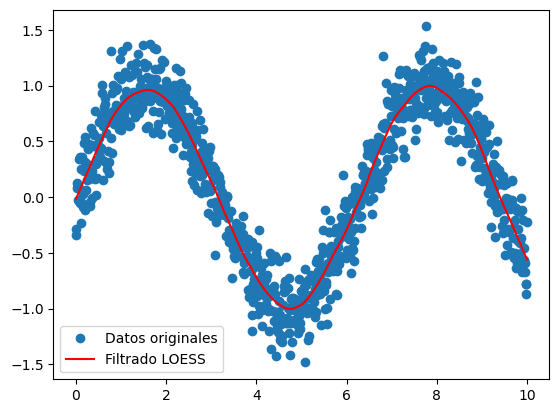

In [3]:
# Generación de datos de ejemplo
x = np.linspace(0, 10, 1000)
y = np.sin(x) + np.random.normal(0, 0.2, x.size)

# Aplicación de LOESS
frac = 0.1  # Ajusta según la suavidad deseada
y_loess = lowess(y, x, frac=frac, it=0)[:, 1]  # it=0 para LOESS puro

# Graficación
plt.plot(x, y, 'o', label='Datos originales')
plt.plot(x, y_loess, 'r-', label='Filtrado LOESS')
plt.legend()
plt.show()

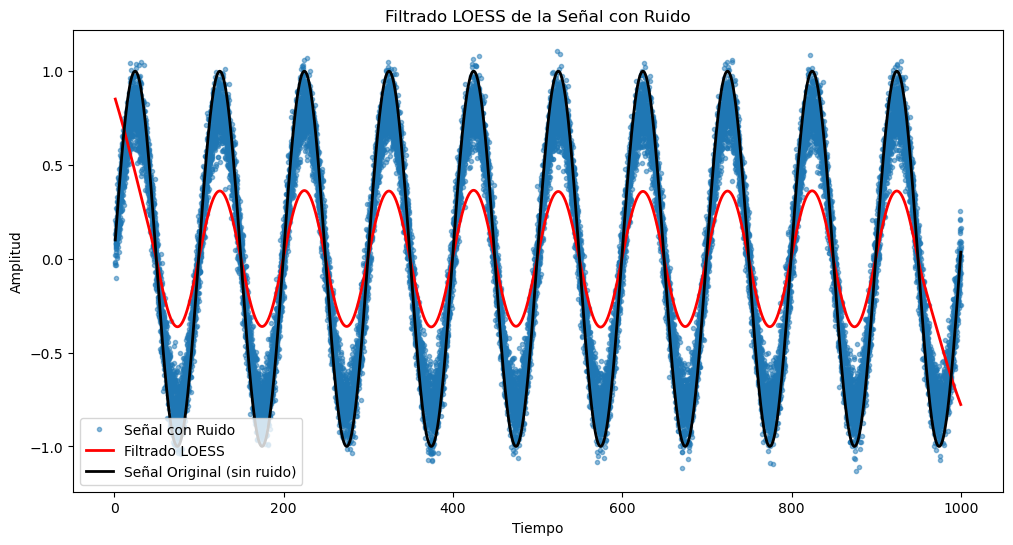

In [4]:
# Definición de parámetros
F0 = 0.01  # Frecuencia fundamental
Fs = 25    # Frecuencia de muestreo
alfa = 0.8 # Atenuación
D = 15     # Retraso inducido por la adquisición
var = 0.01 # Varianza del ruido
media = 0  # Media del ruido

# Generación de tiempo y señal
t = np.arange(1, 1000, 1/Fs)  # Tiempo
Xe = np.sin(2 * np.pi * F0 * (t + 15/Fs))  # Potencial de retraso
w = np.random.normal(media, np.sqrt(var), len(t))  # Ruido gaussiano
Ye = alfa * Xe + w  # Señal con ruido y retraso

# Aplicación del filtrado LOESS
frac = 0.1  # Ajusta la proporción según la suavidad deseada
Ye_loess = lowess(Ye, t, frac=frac, it=0)[:, 1]  # Filtrado LOESS

# Graficación
plt.figure(figsize=(12, 6))
plt.plot(t, Ye, 'o', label='Señal con Ruido', markersize=3, alpha=0.5)
plt.plot(t, Ye_loess, 'r-', label='Filtrado LOESS', linewidth=2)
plt.plot(t, Xe, color='black', linewidth=2, label='Señal Original (sin ruido)')  # Color negro y engrosada
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado LOESS de la Señal con Ruido')
plt.legend()
plt.show()

# Aplicado a una señal del proyecto

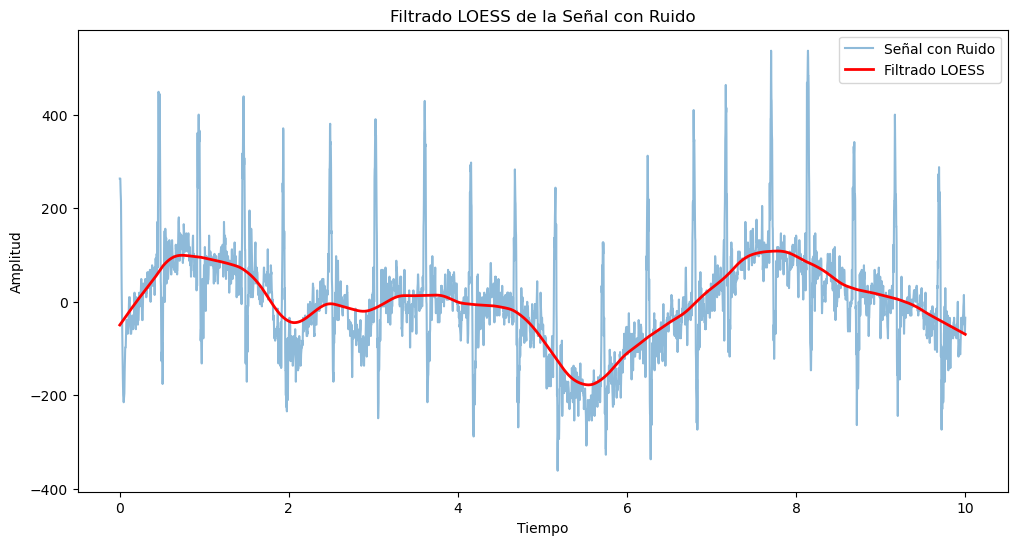

In [9]:
csv = r'C:\Users\santi\OneDrive\Escritorio\Bioseñales\Proyecto 3\ECGData\MUSE_20180113_171327_27000.csv'
df = pd.read_csv(csv, delimiter=',', skiprows=1, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
x0 = df['II'].values

# Definición de parámetros
Fs = 500    # Frecuencia de muestreo
# Generación de tiempo
t = np.arange(len(x0)) / Fs  # Tiempo

# Aplicación del filtrado LOESS
frac = 0.1  # Ajusta la proporción según la suavidad deseada
Ye_loess = lowess(x0, t, frac=frac, it=0)[:, 1]  # Filtrado LOESS

# Graficación
plt.figure(figsize=(12, 6))
plt.plot(t, x0, label='Señal con Ruido', markersize=3, alpha=0.5)
plt.plot(t, Ye_loess, 'r', label='Filtrado LOESS', linewidth=2)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado LOESS de la Señal con Ruido')
plt.legend()
plt.show()

# Non Local Means

Este método o ruta de procesamiento es una técnica de filtrado de ruido, basada en el procesamiento y análisis de imágenes. Dicho método se diferencia de las técnicas de filtrado local, debido a que para la reestructuración de la señal durante el proceso de filtrado, el NLM no solo usa los datos vecinos inmediatos (pixeles vecinos) sino que también toma en cuenta todos aquellos valores similares al valor objetivo(pixel objetivo) con el fin de obtener una media ponderada y así preservar detalles y texturas de la tendencia original [9].

### Procedimiento:
1. Selección del píxel: Para cada píxel en la imagen se determina un área que contiene un grupo de píxeles alrededor de él.
2. Comparación de áreas: Se compara el área de un píxel objetivo con las áreas determinadas para todos los píxeles objetivos en la imagen, midiendo la similitud entre ellos.
3. Cálculo de pesos: Las áreas similares reciben un peso mayor, y las menos similares reciben un peso menor.
4. Reemplazo del valor del píxel objetivo: Finalmente, el valor del objetivo es reemplazado por una media ponderada de los valores de todos los píxeles [9].


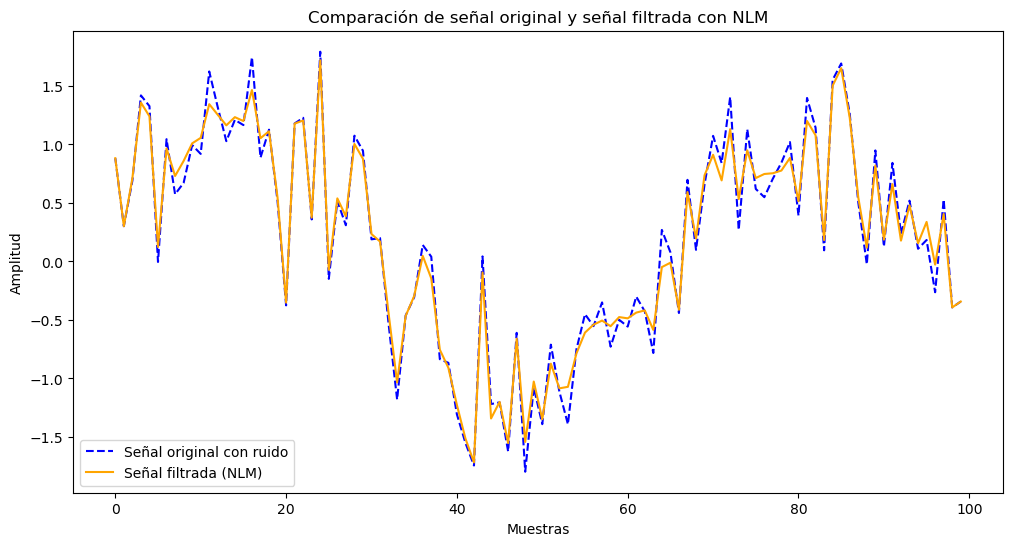

In [11]:
# Generar una señal con ruido (ejemplo)
np.random.seed(0)
signal = np.sin(np.linspace(0, 10, 100)) + 0.5 * np.random.normal(size=100)

# Parámetros del filtro NLM
patch_size = 5   # Tamaño del parche
search_window = 10  # Tamaño de la ventana de búsqueda
h = 0.8  # Parámetro de suavizado

# Función para calcular la distancia gaussiana entre dos parches
def gaussian_distance(patch1, patch2):
    # Asegurar que los parches tienen la misma longitud
    min_length = min(len(patch1), len(patch2))
    patch1 = patch1[:min_length]
    patch2 = patch2[:min_length]
    # Calcular distancia gaussiana
    return np.exp(-np.sum((patch1 - patch2) ** 2) / (h ** 2))

# Aplicar el filtro NLM
filtered_signal = np.zeros_like(signal)

for i in range(len(signal)):
    i_min = max(i - search_window // 2, 0)
    i_max = min(i + search_window // 2, len(signal) - 1)
    patch_ref = signal[max(i - patch_size // 2, 0): min(i + patch_size // 2 + 1, len(signal))]

    weights = []
    weighted_values = []

    for j in range(i_min, i_max + 1):
        patch_j = signal[max(j - patch_size // 2, 0): min(j + patch_size // 2 + 1, len(signal))]

        # Verificar que los parches tengan la misma longitud antes de calcular la distancia
        if len(patch_ref) == len(patch_j):
            weight = gaussian_distance(patch_ref, patch_j)
            weights.append(weight)
            weighted_values.append(weight * signal[j])

    # Normalizar pesos y calcular el valor filtrado
    if weights:
        filtered_signal[i] = sum(weighted_values) / sum(weights)

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(12, 6))
plt.plot(signal, label="Señal original con ruido", color="blue", linestyle="--")
plt.plot(filtered_signal, label="Señal filtrada (NLM)", color="orange")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.title("Comparación de señal original y señal filtrada con NLM")
plt.legend()
plt.show()

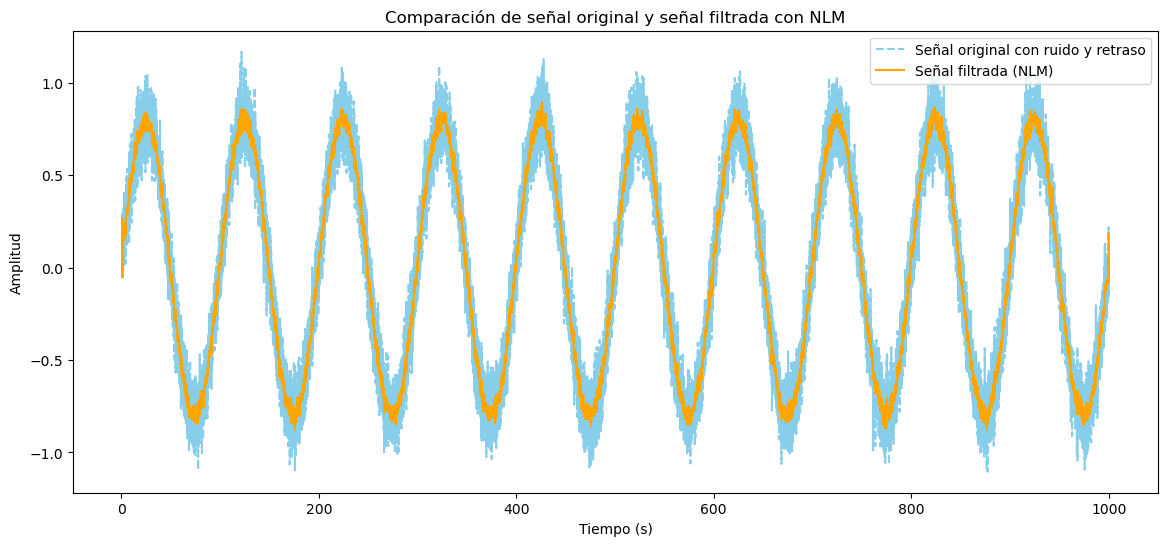

In [12]:
# Definición de parámetros
F0 = 0.01      # Frecuencia fundamental
Fs = 25        # Frecuencia de muestreo
alfa = 0.8     # Atenuación
D = 15         # Retraso inducido por la adquisición
var = 0.01     # Varianza del ruido
media = 0      # Media del ruido

# Generación de tiempo y señal
t = np.arange(1, 1000, 1/Fs)  # Tiempo
Xe = np.sin(2 * np.pi * F0 * (t + D / Fs))  # Potencial de retraso
w = np.random.normal(media, np.sqrt(var), len(t))  # Ruido gaussiano
Ye = alfa * Xe + w  # Señal con ruido y retraso

# Parámetros del filtro NLM
patch_size = 5   # Tamaño del parche
search_window = 15  # Tamaño de la ventana de búsqueda
h = 0.6  # Parámetro de suavizado

# Función para calcular la distancia gaussiana entre dos parches
def gaussian_distance(patch1, patch2):
    min_length = min(len(patch1), len(patch2))
    patch1 = patch1[:min_length]
    patch2 = patch2[:min_length]
    return np.exp(-np.sum((patch1 - patch2) ** 2) / (h ** 2))

# Aplicación del filtro NLM
filtered_signal = np.zeros_like(Ye)

for i in range(len(Ye)):
    i_min = max(i - search_window // 2, 0)
    i_max = min(i + search_window // 2, len(Ye) - 1)
    patch_ref = Ye[max(i - patch_size // 2, 0): min(i + patch_size // 2 + 1, len(Ye))]

    weights = []
    weighted_values = []

    for j in range(i_min, i_max + 1):
        patch_j = Ye[max(j - patch_size // 2, 0): min(j + patch_size // 2 + 1, len(Ye))]
        
        if len(patch_ref) == len(patch_j):
            weight = gaussian_distance(patch_ref, patch_j)
            weights.append(weight)
            weighted_values.append(weight * Ye[j])

    # Normalizar pesos y calcular el valor filtrado
    if weights:
        filtered_signal[i] = sum(weighted_values) / sum(weights)

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(14, 6))
plt.plot(t, Ye, label="Señal original con ruido y retraso", color="skyblue", linestyle="--")
plt.plot(t, filtered_signal, label="Señal filtrada (NLM)", color="orange")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Comparación de señal original y señal filtrada con NLM")
plt.legend()
plt.show()

# Aplicado a una señal del proyecto

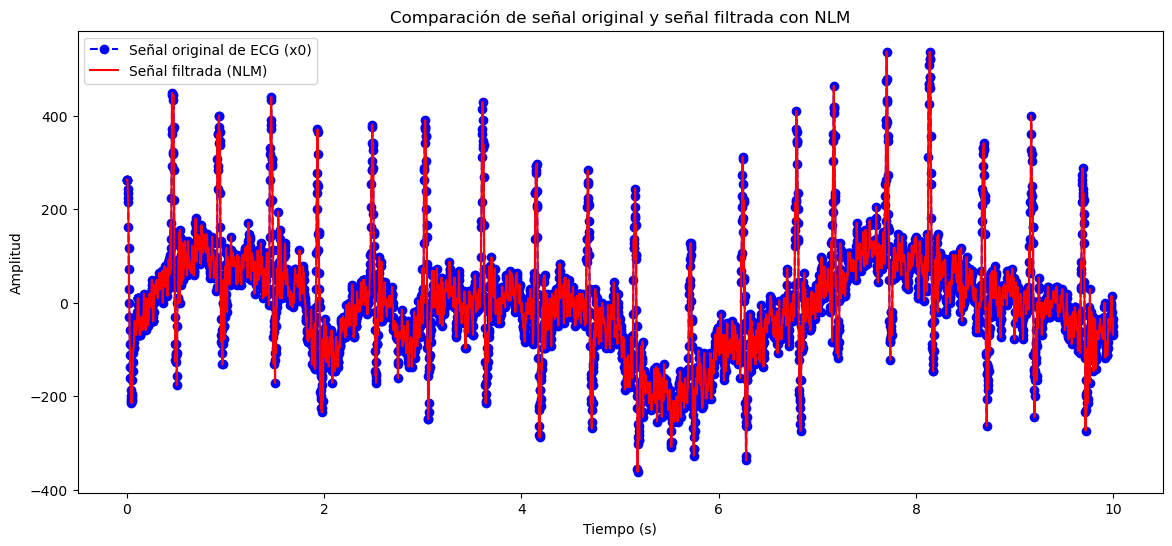

In [15]:
csv = r'C:\Users\santi\OneDrive\Escritorio\Bioseñales\Proyecto 3\ECGData\MUSE_20180113_171327_27000.csv'
df = pd.read_csv(csv, delimiter=',', skiprows=1, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
x0 = df['II'].values

# Parámetros para el filtro NLM
patch_size = 5       # Tamaño del parche
search_window = 15   # Tamaño de la ventana de búsqueda
h = 0.6              # Parámetro de suavizado
Fs = 500              # Frecuencia de muestreo

# Generación del tiempo
t = np.arange(0, len(x0) / Fs, 1 / Fs)  # Vector de tiempo basado en la longitud de x0

# Función para calcular la distancia gaussiana entre dos parches
def gaussian_distance(patch1, patch2, h):
    min_length = min(len(patch1), len(patch2))
    patch1 = patch1[:min_length]
    patch2 = patch2[:min_length]
    return np.exp(-np.sum((patch1 - patch2) ** 2) / (h ** 2))

# Aplicación del filtro NLM a la señal `x0`
filtered_signal = np.zeros_like(x0)

for i in range(len(x0)):
    # Determinación de la ventana de búsqueda y el parche de referencia
    i_min = max(i - search_window // 2, 0)
    i_max = min(i + search_window // 2, len(x0) - 1)
    patch_ref = x0[max(i - patch_size // 2, 0): min(i + patch_size // 2 + 1, len(x0))]

    weights = []
    weighted_values = []

    for j in range(i_min, i_max + 1):
        patch_j = x0[max(j - patch_size // 2, 0): min(j + patch_size // 2 + 1, len(x0))]
        
        if len(patch_ref) == len(patch_j):
            weight = gaussian_distance(patch_ref, patch_j, h)
            weights.append(weight)
            weighted_values.append(weight * x0[j])

    # Normalizar pesos y calcular el valor filtrado para la posición `i`
    if weights:
        filtered_signal[i] = sum(weighted_values) / sum(weights)

# Graficación de la señal original `x0` y la señal filtrada
plt.figure(figsize=(14, 6))
plt.plot(t, x0,'o' ,label="Señal original de ECG (x0)", color="blue", linestyle="--")
plt.plot(t, filtered_signal, label="Señal filtrada (NLM)", color="red")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Comparación de señal original y señal filtrada con NLM")
plt.legend()
plt.show()

# Filtros Wavelet

Los filtros wavelet son una herramienta matemática basada en la aplicación de la transformada de wavelet la cual  es  implementada para la descomposición de señales o imágenes, en componentes frecuenciales y de tiempo específicos. Dicha transformada se define como; ondas de duración limitada y amplitud variable, las cuales permiten la obtención de características generales o detalles específicos de una señal. Se caracterizan por ser ondas asimétricas e irregulares, características que les brindan una mayor adaptabilidad en los procesos de análisis de señales comparado con otros métodos matemáticos como lo es la transformada de fourier [11].

# Filtro wavelet Daubechies base

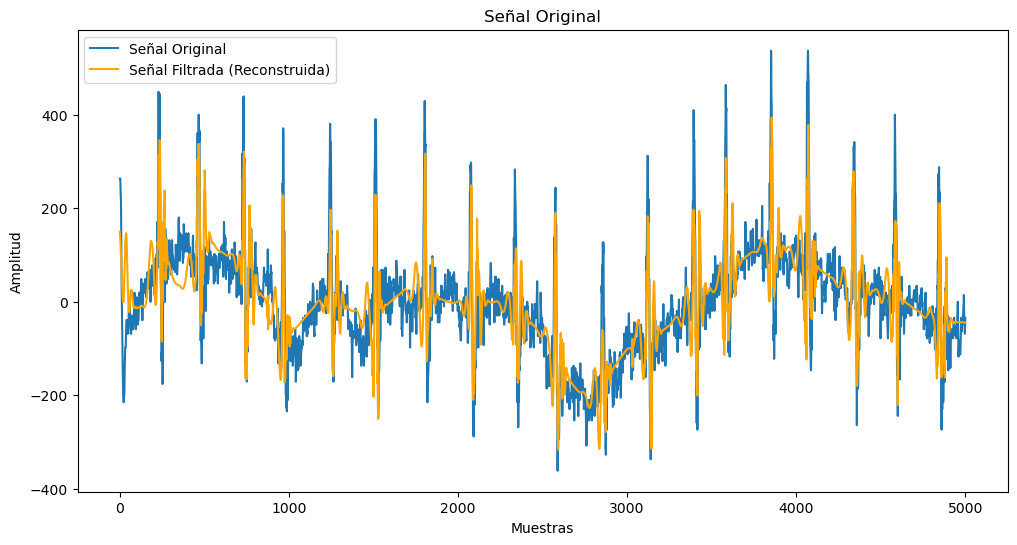

Umbral utilizado: 4.129779530064621
Desviaciones estándar del ruido: [215.69724515153473, 216.88043884862057, 240.09350811401606, 104.77457312244566, 76.07248374576714, 44.16270588390179, 20.729539646296768, 7.326119377445547]


In [2]:
def wavelet_denoise_filter(signal, wavelet='db6', level=8):
    # Paso 1: Descomposición en coeficientes wavelet
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    details = coeffs[1:]

    # Paso 2: Cálculo de la desviación estándar del ruido (basado en wnoisest)
    std_devs = [np.median(np.abs(detail)) / 0.6745 for detail in details]

    # Paso 3: Cálculo del umbral (basado en threshold)
    num_samples = sum([detail.size for detail in details])
    thr = np.sqrt(2 * np.log(num_samples))

    # Paso 4: Aplicar el umbral a los coeficientes detallados (basado en wthresh)
    filtered_details = []
    for i, detail in enumerate(details):
        thresholded = np.multiply(detail, np.abs(detail) > (thr * std_devs[i]))
        filtered_details.append(thresholded)

    # Reconstruir la señal utilizando los coeficientes de aproximación original y los detalles filtrados
    coeffs_filtered = [coeffs[0]] + filtered_details
    filtered_signal = pywt.waverec(coeffs_filtered, wavelet)
    filtered_signal = filtered_signal[:signal.shape[0]]  # Asegurar que la longitud coincide

    plt.figure(figsize=(12, 6))
    plt.plot(signal, label='Señal Original')
    plt.plot(filtered_signal, label='Señal Filtrada (Reconstruida)', color='orange')
    plt.title("Señal Original")
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.show()

    return filtered_signal, thr, std_devs


csv = r'C:\Users\santi\OneDrive\Escritorio\Bioseñales\Proyecto 3\ECGData\MUSE_20180113_171327_27000.csv'
df = pd.read_csv(csv, delimiter=',', skiprows=1, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
x0 = df['II'].values

filtered_signal, thr, std_devs = wavelet_denoise_filter(x0)
print("Umbral utilizado:", thr)
print("Desviaciones estándar del ruido:", std_devs)

# Extraccion de señales

In [2]:
def extract_filenames_with_rhythm(excel_path, AFIB_rhythms=['AFIB'], SB_rhythms=['SB']):
    # Leer el archivo Excel
    df = pd.read_excel(excel_path)
    
    # Filtrar por los ritmos deseados
    AFIB_df = df[df['Rhythm'].isin(AFIB_rhythms)]
    SB_df = df[df['Rhythm'].isin(SB_rhythms)]
    
    # Extraer los valores de la columna 'FileName'
    AFIB = AFIB_df['FileName'].values.tolist()
    SB = SB_df['FileName'].values.tolist()
    
    return AFIB, SB

def read_ecg_files(AFIB, SB, folder_path):
    AFIB_data = {}
    for file_name in AFIB:
        file_path = os.path.join(folder_path, f"{file_name}.csv")
        
        # Verificar si el archivo existe
        if os.path.exists(file_path):
            # Leer el archivo .csv
            df = pd.read_csv(file_path, delimiter=',', skiprows=1, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
            
            # Guardar los datos de la columna 'II'
            AFIB_data[file_name] = df['II'].values
        else:
            print(f"Archivo {file_path} no encontrado.")
            
    SB_data = {}
    for file_name in SB:
        file_path = os.path.join(folder_path, f"{file_name}.csv")
        
        # Verificar si el archivo existe
        if os.path.exists(file_path):
            # Leer el archivo .csv
            df = pd.read_csv(file_path, delimiter=',', skiprows=1, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
            
            # Guardar los datos de la columna 'II'
            SB_data[file_name] = df['II'].values
        else:
            print(f"Archivo {file_path} no encontrado.")
    
    return AFIB_data, SB_data

# Ruta al archivo Excel y a la carpeta de archivos .csv

excel_path = r'C:\Users\santi\OneDrive\Escritorio\Bioseñales\Proyecto 2\Diagnostics.xlsx'
csv_folder_path = r'C:\Users\santi\OneDrive\Escritorio\Bioseñales\Proyecto 3\ECGData'

# Extraer los nombres de archivos que nos interesan
AFIB, SB = extract_filenames_with_rhythm(excel_path)

AFIB_values, SB_values = read_ecg_files(AFIB, SB, csv_folder_path)

# 10 señales para aplicar los 3 flujos

In [3]:
AFIB_reducido = dict(list(AFIB_values.items())[:5])
SB_reducido = dict(list(SB_values.items())[:5])

print("Diccionario AFIB reducido:", AFIB_reducido)
print("Diccionario SB reducido:", SB_reducido)

Diccionario AFIB reducido: {'MUSE_20180113_171327_27000': array([263.52, 263.52, 263.52, ..., -68.32, -48.8 , -34.16]), 'MUSE_20180114_075026_69000': array([-156.16, -112.24, -117.12, ...,   53.68,   73.2 ,   97.6 ]), 'MUSE_20180113_133901_16000': array([-78.08, -78.08, -78.08, ..., -39.04, -39.04, -53.68]), 'MUSE_20180116_123940_90000': array([165.92, 175.68, 146.4 , ..., -34.16, -19.52, -24.4 ]), 'MUSE_20180114_075003_61000': array([-24.4 ,  -4.88, -24.4 , ...,  82.96, 107.36, 107.36])}
Diccionario SB reducido: {'MUSE_20180112_073319_29000': array([  9.76, -19.52, -19.52, ...,   9.76,   9.76,   9.76]), 'MUSE_20180113_121940_44000': array([ 107.36,  107.36,  107.36, ...,  -97.6 , -107.36,  -97.6 ]), 'MUSE_20180112_120347_79000': array([-68.32, -68.32, -68.32, ...,   0.  ,   9.76,  19.52]), 'MUSE_20180114_075128_92000': array([-112.24,  -97.6 ,  -92.72, ...,   34.16,   24.4 ,   39.04]), 'MUSE_20180118_174026_42000': array([-175.68, -165.92, -156.16, ...,   14.64,   34.16,   53.68])}


# Filtros Wavelet en el análisis de señales ECG

1. Daubechies Wavelets
Las wavelets Daubechies, desarrolladas por Ingrid Daubechies, son una de las familias de wavelets más utilizadas para el procesamiento de señales ECG. Esta familia se caracteriza por ser compactamente soportada, lo que significa que las wavelets tienen una duración limitada, un aspecto esencial para analizar señales transitorias como el ECG. Las wavelets Daubechies están definidas por un orden (por ejemplo, Db2, Db4, etc.), donde el número indica el nivel de suavidad y complejidad de la wavelet. A mayor orden, la wavelet es capaz de capturar más detalles finos en la señal, lo cual es especialmente útil para detectar y analizar eventos críticos, como los picos QRS y las ondas P y T en el ECG. La capacidad de Daubechies para captar tanto detalles como características generales hace que sean ideales para descomponer y reconstruir señales ECG con alta precisión [10].

2. Haar Wavelet
El filtro Haar es la wavelet más simple y es la base de la transformada wavelet. La Haar wavelet es de corta duración y tiene una forma escalonada, lo cual permite detectar cambios abruptos en la señal. Aunque esto puede ser útil en algunas aplicaciones, la Haar wavelet tiene limitaciones para el análisis de señales ECG, ya que esta señal requiere de una detección de eventos sutiles y suaves, y la forma escalonada de Haar no proporciona un ajuste adecuado para capturar los detalles complejos del ECG. Debido a su simplicidad, el filtro Haar puede no ser el ideal para aplicaciones ECG complejas, aunque puede ser útil para análisis preliminares o aplicaciones donde se requiera alta velocidad de procesamiento, debido a su simplicidad y facilidad de implementación generalmente se usan para compresión de imágenes y reconstrucción de funciones [12].

3. Symlet Wavelets
Las wavelets Symlet son una versión simetrizada de las Daubechies, también desarrolladas por Ingrid Daubechies. La simetría es útil en análisis de señales porque minimiza los errores de fase durante la descomposición y reconstrucción, lo cual es ventajoso cuando se requiere precisión en la ubicación temporal de las características de la señal ECG. Las wavelets Symlet también son compactamente soportadas y tienen propiedades de ortogonalidad y suavidad, al igual que las Daubechies. Esto les permite capturar características importantes de la señal ECG, como el complejo QRS, mientras que la simetría reduce el riesgo de distorsiones. Sin embargo, en la práctica, las wavelets Symlet y Daubechies suelen ofrecer resultados similares en el análisis de ECG [13].

4. Coiflet Wavelets
Las wavelets Coiflet, desarrolladas por Ronald Coifman, son wavelets ortogonales diseñadas específicamente para tener una media nula y una simetría mayor que las Daubechies. En el análisis de señales ECG, las Coiflet pueden ser útiles debido a su capacidad para capturar tanto detalles finos como características generales sin perder la precisión en la reconstrucción. Al igual que las Daubechies, las wavelets Coiflet tienen ordenes distintos (Coif1, Coif2, etc.), y su mayor suavidad las hace adecuadas para la detección de ondas P y T. Sin embargo, en comparación con las Daubechies, las Coiflet son menos utilizadas en el procesamiento de ECG debido a que tienen una longitud de soporte mayor, lo que puede reducir la eficiencia computacional en algunos casos [13].

5. Biorthogonal Wavelets
Las wavelets Biorthogonales son una clase especial de wavelets que permiten tener filtros de análisis y síntesis de longitud diferente, proporcionando flexibilidad en la reconstrucción de señales. Esto es útil cuando se requiere un análisis multirresolución de la señal ECG. Además, estas wavelets son simétricas, lo que reduce la distorsión de fase y mejora la localización temporal de las características de la señal. Sin embargo, debido a su naturaleza biortogonal, estas wavelets son menos compactas que las Daubechies, lo que puede no ser tan eficiente para el análisis de ECG en tiempo real. Aun así, son útiles en aplicaciones donde la reconstrucción precisa de la señal es crítica [13].

6. Meyer Wavelet
La Meyer Wavelet es una wavelet continua que no es compactamente soportada, lo que significa que su duración se extiende más en comparación con otras wavelets como Daubechies o Haar. Las Meyer wavelets son suaves y tienen una respuesta en frecuencia bien definida, lo que les permite capturar frecuencias específicas de la señal. Sin embargo, debido a su falta de soporte compacto, no es ideal para el análisis de señales transitorias o cortas como el ECG, donde la precisión en la localización temporal es clave. Las Meyer wavelets suelen usarse más en análisis de señales con contenido de frecuencia más estable y menos en señales con eventos rápidos y transitorios como el ECG [11].

#### Justificación de la elección de Daubechies para análisis de ECG

La wavelet Daubechies se considera una de las más adecuadas para el análisis de señales ECG debido a varias razones clave:

- Compactación y soporte limitado: Las Daubechies son compactamente soportadas, lo cual es crucial para detectar eventos transitorios en la señal ECG, como el complejo QRS y las ondas P y T. Esta propiedad permite a las Daubechies concentrarse en los cambios rápidos y capturar detalles importantes sin extenderse innecesariamente en el tiempo.

- Buena localización en el dominio tiempo-frecuencia: La estructura de las wavelets Daubechies permite una excelente localización en el dominio tiempo-frecuencia, lo cual es esencial para analizar los distintos componentes de la señal ECG, ya que esta presenta eventos de corta y larga duración.

- Adaptabilidad y distintos niveles de detalle: Las Daubechies permiten elegir diferentes niveles de orden, lo que proporciona flexibilidad para ajustar la resolución de la wavelet según el tipo de característica que se desea detectar en la señal ECG. Esto es particularmente útil cuando se necesita un análisis multiescala para capturar características específicas a diferentes resoluciones.

- Precedente en la literatura: Diversos estudios en el análisis de ECG han demostrado la efectividad de las Daubechies en la detección de arritmias y otros patrones. Además, el filtro Daubechies ha mostrado una alta precisión en la separación de componentes relevantes en la señal ECG, lo cual es fundamental para el diagnóstico clínico [10].

- Balance entre eficiencia computacional y precisión: Las Daubechies, especialmente en órdenes bajos, son computacionalmente eficientes en comparación con otras wavelets como las Coiflet o Biorthogonales, y ofrecen precisión suficiente para aplicaciones en tiempo real, como el monitoreo de pacientes. Esto las convierte en una opción adecuada para sistemas de análisis en tiempo real.

# Flujo 1

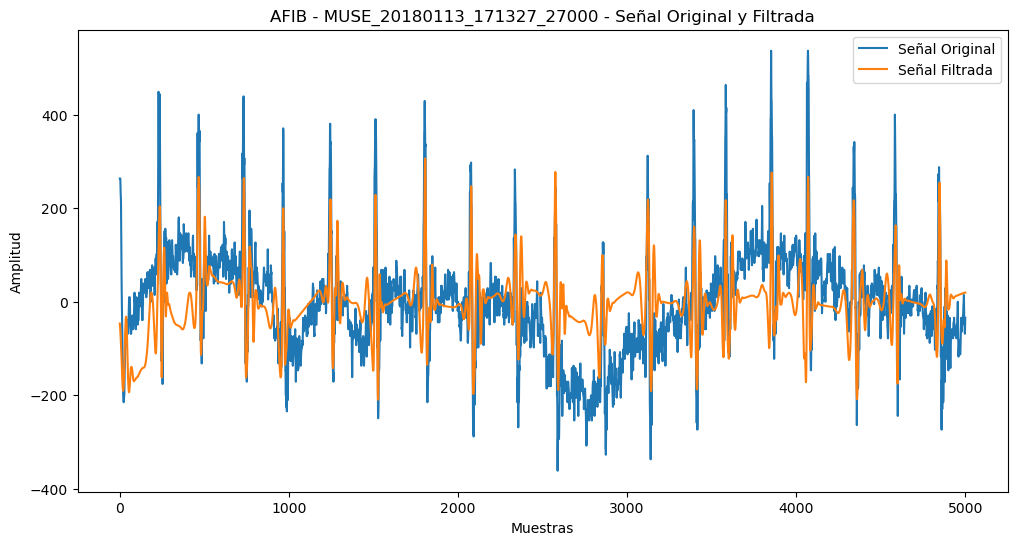

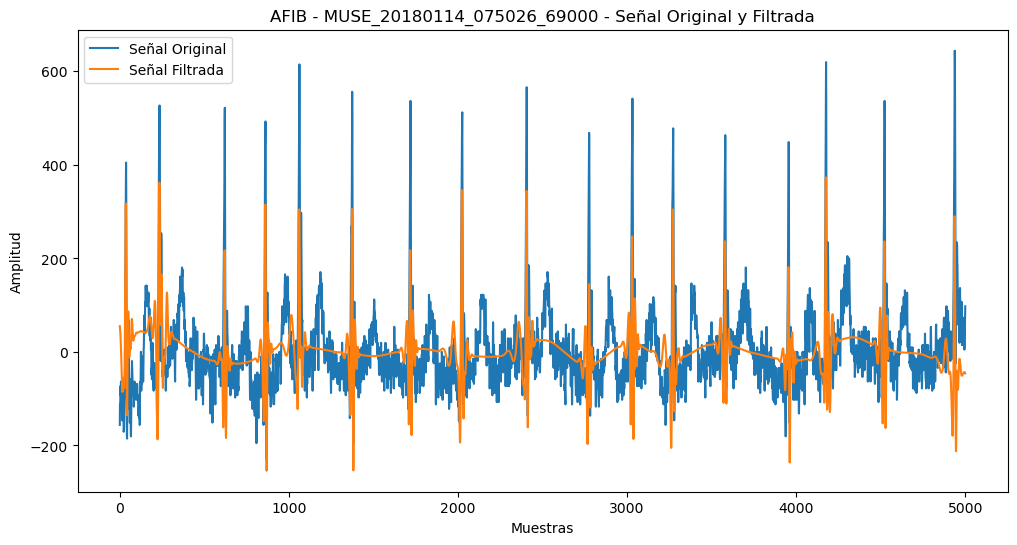

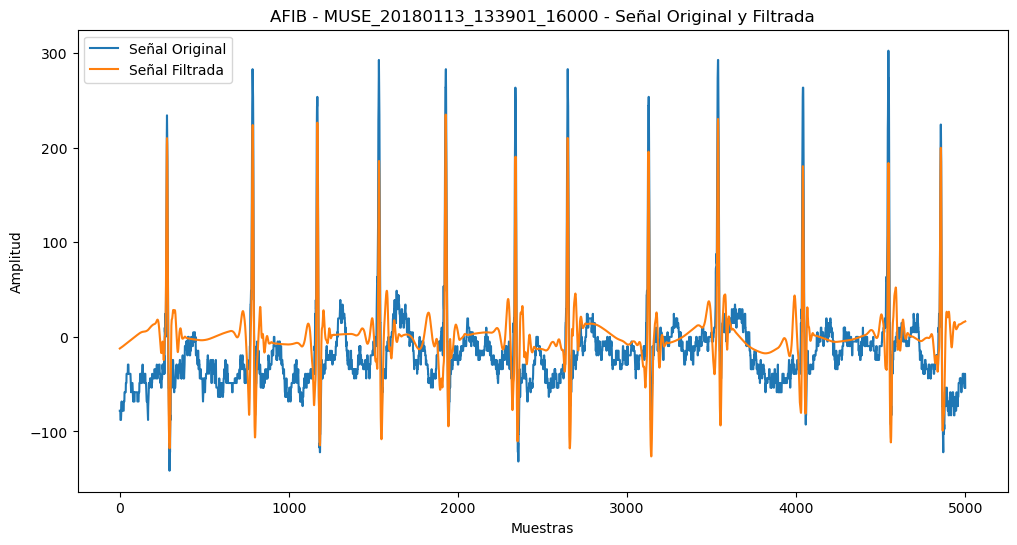

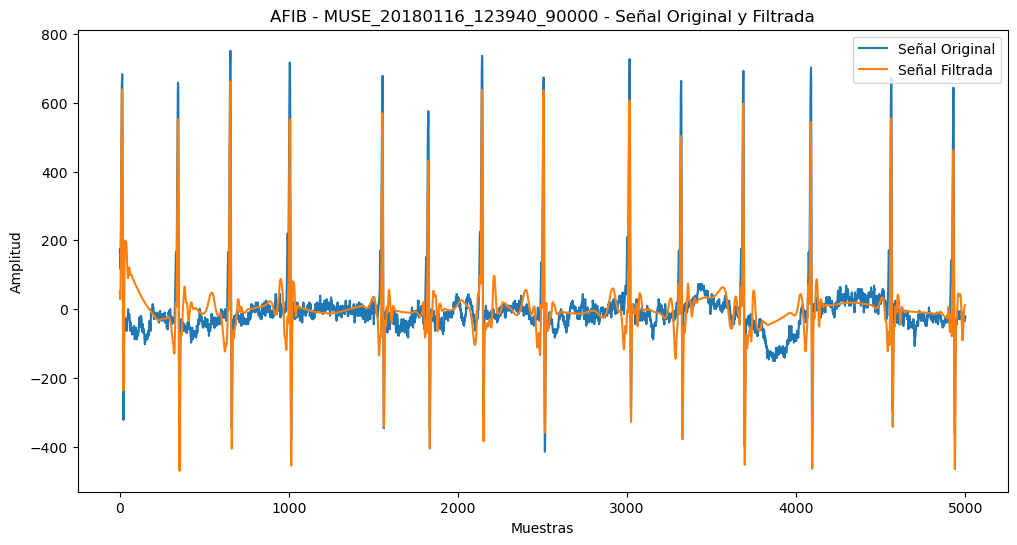

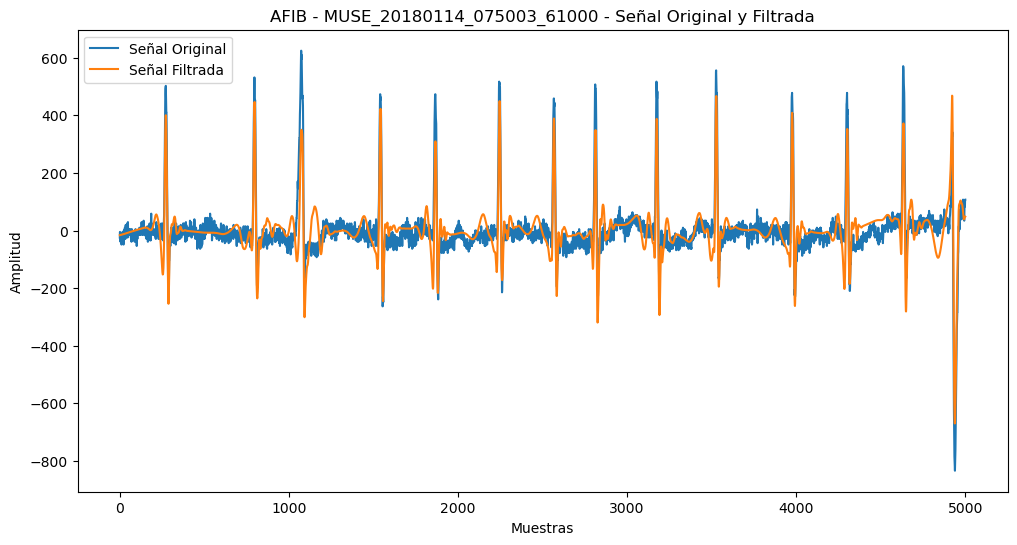

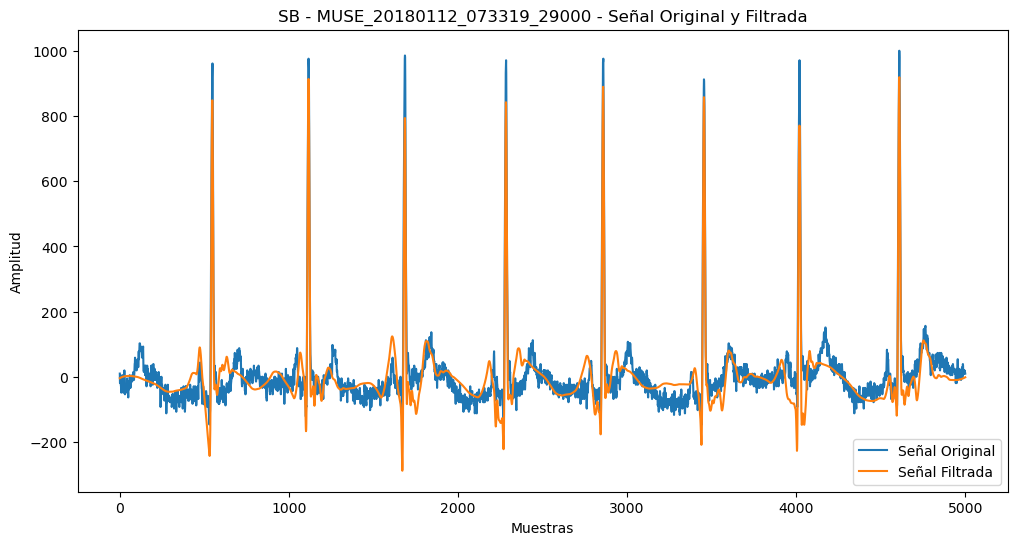

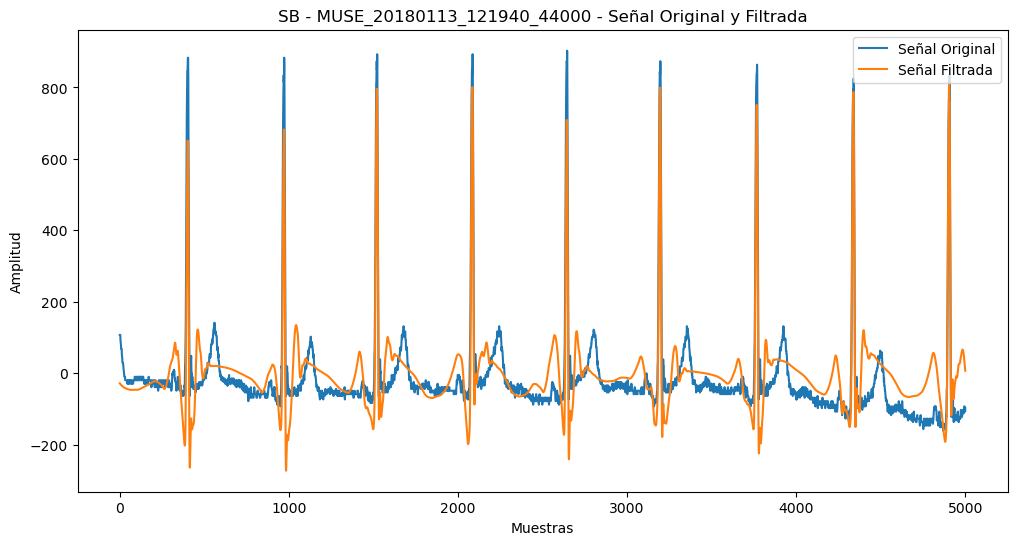

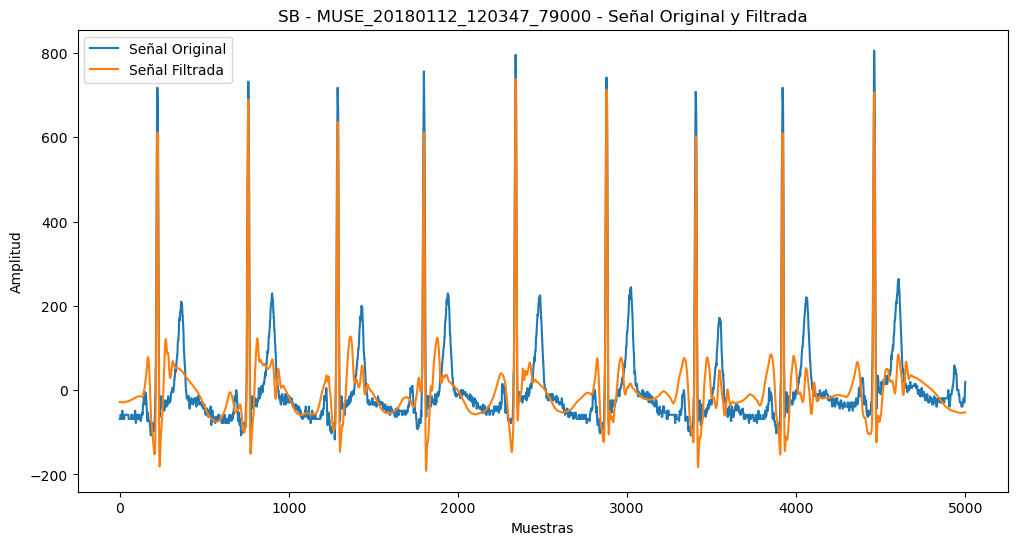

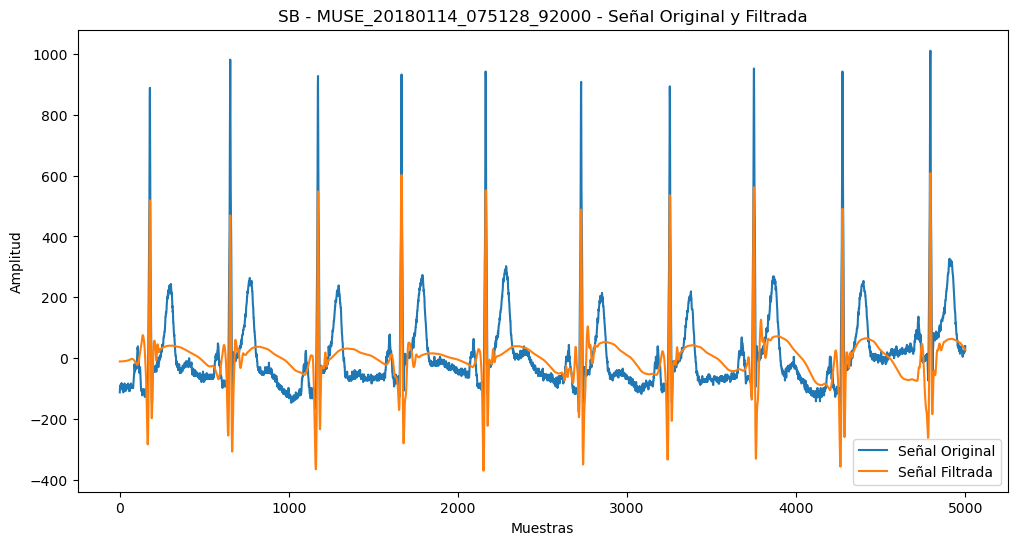

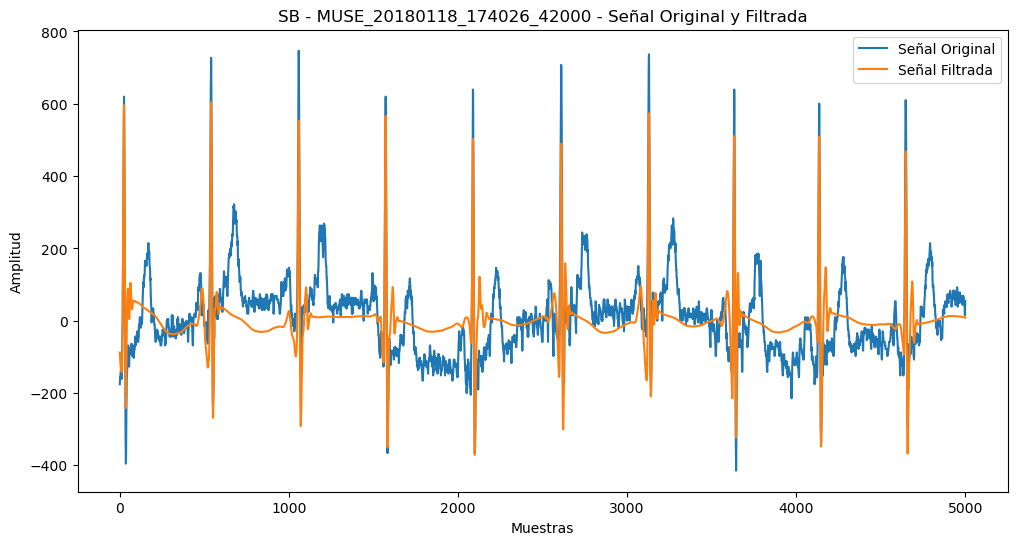

In [4]:
def high_pass_filter(signal_data, cutoff=0.5, fs=500, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    filtered_signal = signal.filtfilt(b, a, signal_data)
    return filtered_signal

def modified_wavelet_filter(signal_data, wavelet='db6', level=8):
    # Paso 1: Descomposición en coeficientes wavelet usando Daubechies
    coeffs = pywt.wavedec(signal_data, wavelet, level=level)
    details = coeffs[1:]  # Ignorar la aproximación de mayor nivel

    # Paso 2: Cálculo de la desviación estándar del ruido
    std_devs = [np.median(np.abs(detail)) / 0.6745 for detail in details]
    
    # Paso 3: Cálculo del umbral
    num_samples = sum([detail.size for detail in details])
    thr = np.sqrt(2 * np.log(num_samples))

    # Paso 4: Aplicar el umbral a los coeficientes detallados
    filtered_details = []
    for i, detail in enumerate(details):
        thresholded = np.multiply(detail, np.abs(detail) > (thr * std_devs[i]))
        filtered_details.append(thresholded)

    # Paso 5: Reconstrucción de la señal usando los coeficientes filtrados
    coeffs_filtered = [coeffs[0]] + filtered_details
    filtered_signal = pywt.waverec(coeffs_filtered, wavelet)
    return filtered_signal


def low_pass_filter(signal_data, cutoff=50, fs=500, order=40):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b = signal.firwin(order, normal_cutoff)
    filtered_signal = signal.filtfilt(b, [1.0], signal_data)
    return filtered_signal

# Función para procesar todas las señales
def process_all_signals(AFIB_xn, SB_xn):
    # Procesar todas las señales de AFIB
    for AFIB_name, AFIB_signal in AFIB_xn.items():
        # Asegurarse de que la señal sea un ndarray
        AFIB_signal = np.asarray(AFIB_signal)
        
        filtered_signal_hp = high_pass_filter(AFIB_signal, cutoff=0.5, fs=500)
        filtered_signal_wavelet = modified_wavelet_filter(filtered_signal_hp, wavelet='db6', level=8)
        final_filtered_signal = low_pass_filter(filtered_signal_wavelet, cutoff=50, fs=500)
        
        # Mostrar la señal original y procesada
        plt.figure(figsize=(12, 6))
        plt.plot(AFIB_signal, label='Señal Original')  # Usar AFIB_signal
        plt.plot(final_filtered_signal, label='Señal Filtrada')
        plt.legend()
        plt.xlabel("Muestras")
        plt.ylabel("Amplitud")
        plt.title(f"AFIB - {AFIB_name} - Señal Original y Filtrada")
        plt.show()

    # Procesar todas las señales de SB
    for SB_name, SB_signal in SB_xn.items():
        # Asegurarse de que la señal sea un ndarray
        SB_signal = np.asarray(SB_signal)
        
        filtered_signal_hp = high_pass_filter(SB_signal, cutoff=0.5, fs=500)
        filtered_signal_wavelet = modified_wavelet_filter(filtered_signal_hp, wavelet='db4', level=8)
        final_filtered_signal = low_pass_filter(filtered_signal_wavelet, cutoff=50, fs=500)
        
        # Mostrar la señal original y procesada
        plt.figure(figsize=(12, 6))
        plt.plot(SB_signal, label='Señal Original')  # Usar SB_signal
        plt.plot(final_filtered_signal, label='Señal Filtrada')
        plt.legend()
        plt.xlabel("Muestras")
        plt.ylabel("Amplitud")
        plt.title(f"SB - {SB_name} - Señal Original y Filtrada")
        plt.show()

# Llamada a la función para procesar las señales
process_all_signals(AFIB_reducido, SB_reducido)

# Flujo 2

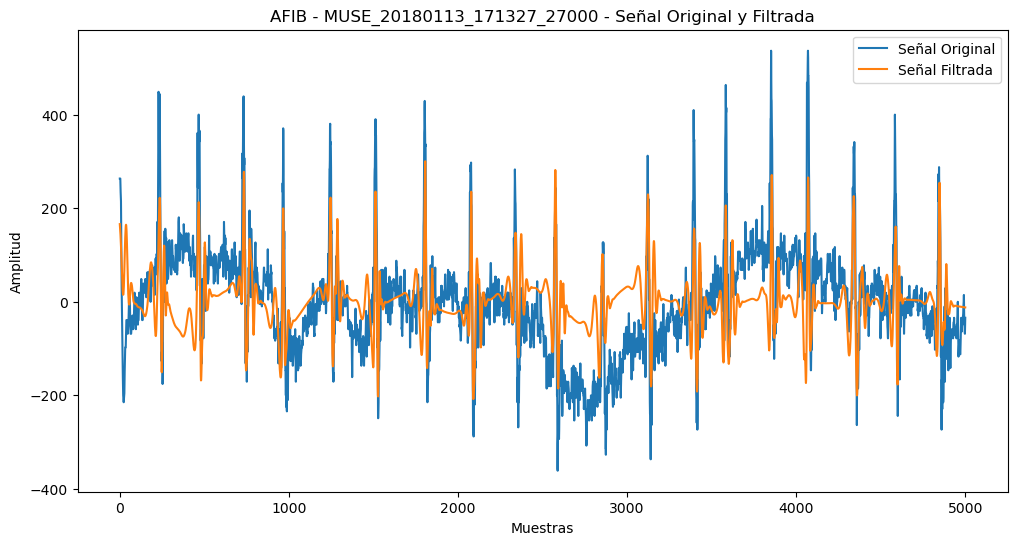

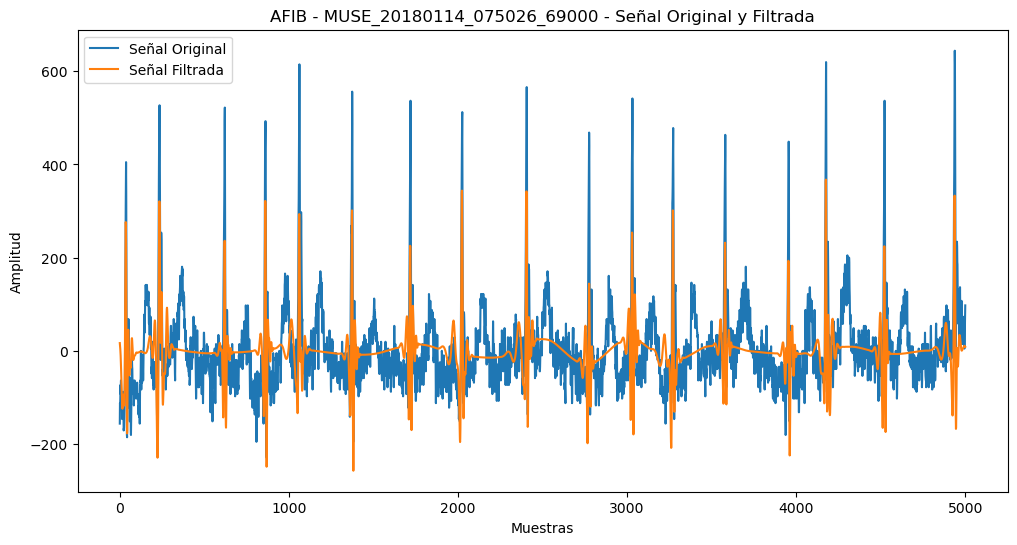

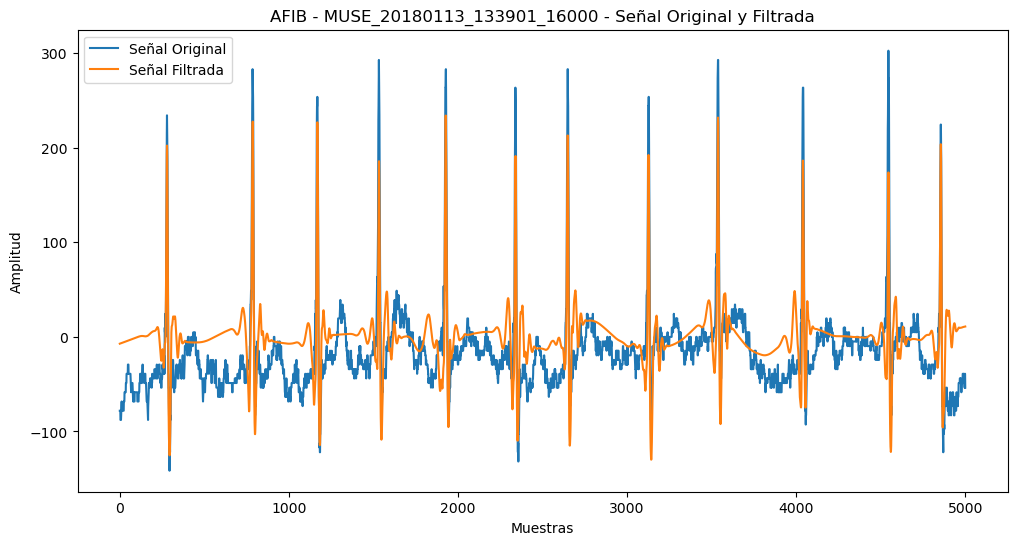

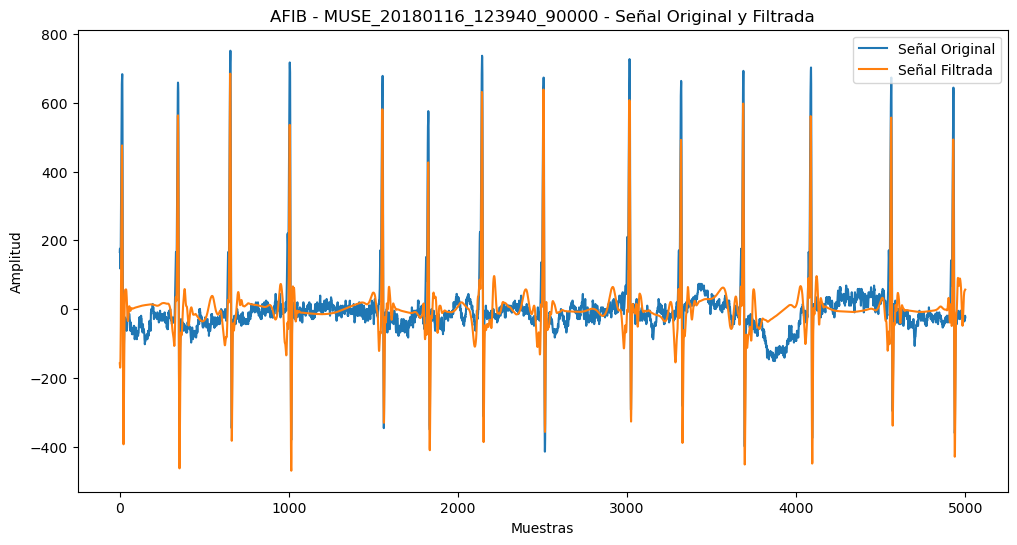

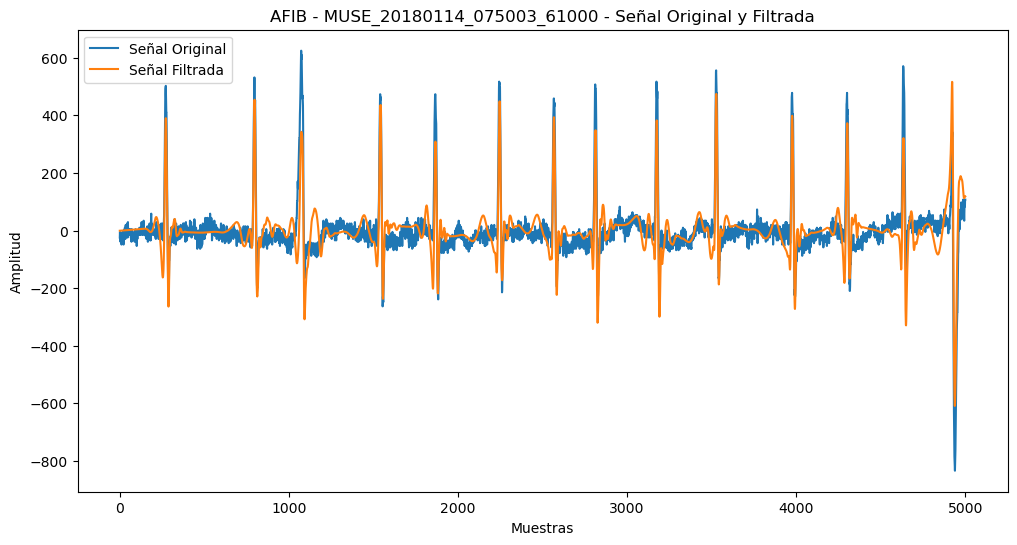

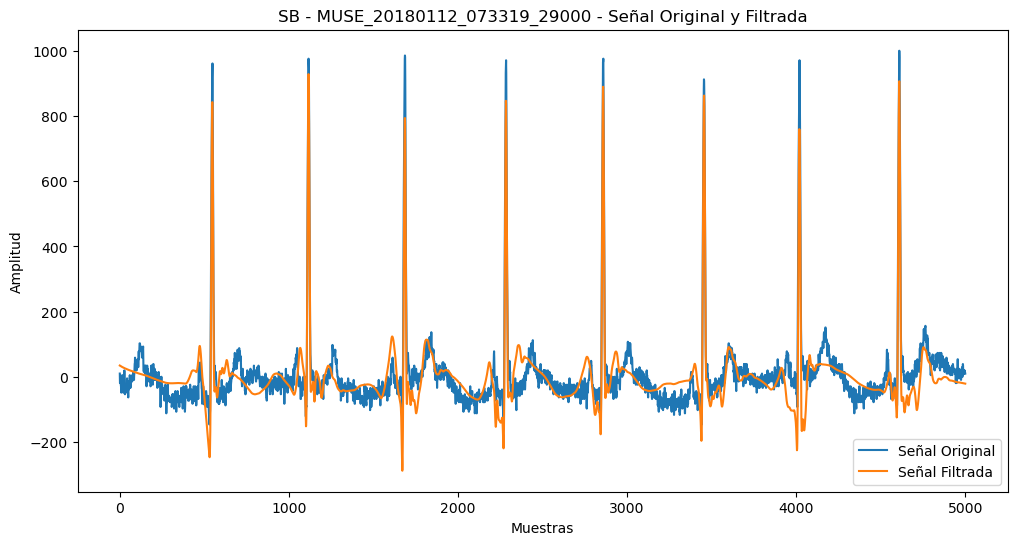

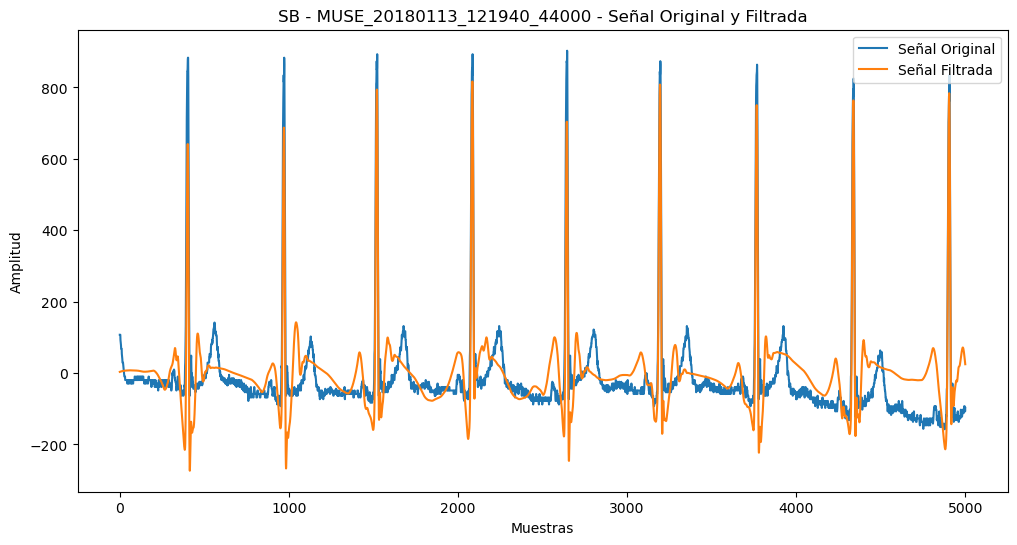

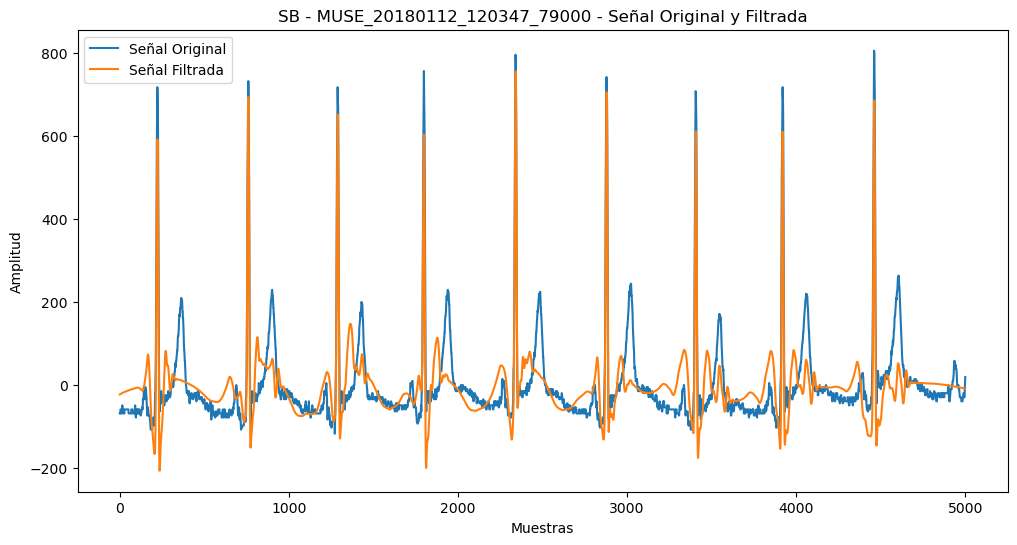

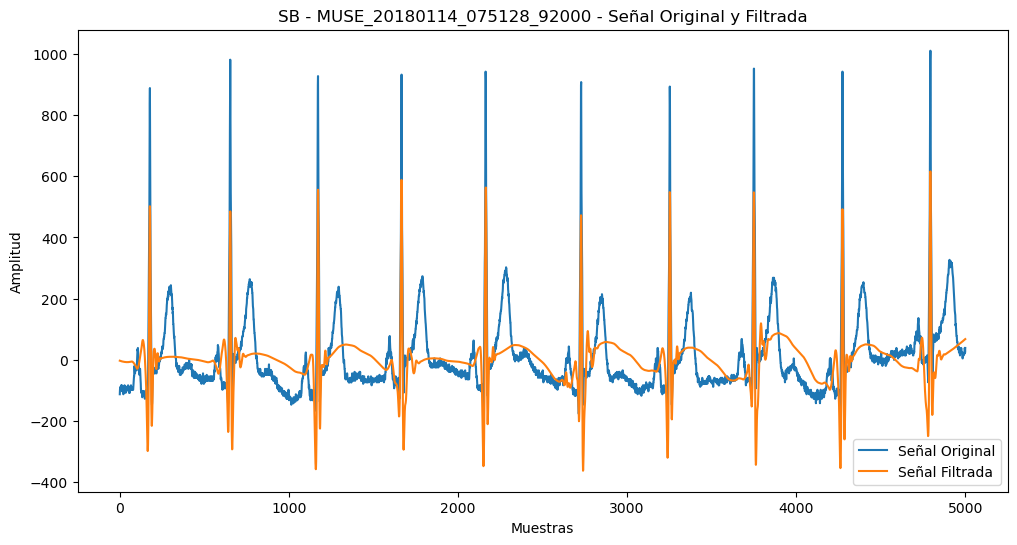

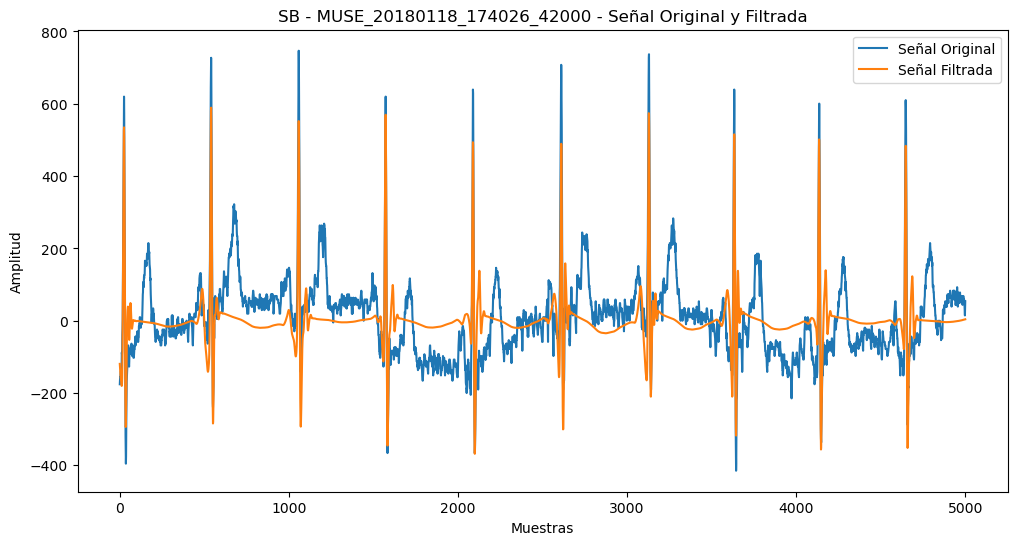

In [6]:
def apply_detrend(x0, n=15):
    k = len(x0)
    t = np.arange(k)
    poly_coeffs = np.polyfit(t, x0, n)
    trend = np.polyval(poly_coeffs, t)
    # Señal detrend es la original menos la tendencia
    xn = x0 - trend
    return xn

def modified_wavelet_filter(signal_data, wavelet='db6', level=8):
    # Paso 1: Descomposición en coeficientes wavelet usando Daubechies
    coeffs = pywt.wavedec(signal_data, wavelet, level=level)
    details = coeffs[1:]  # Ignorar la aproximación de mayor nivel

    # Paso 2: Cálculo de la desviación estándar del ruido
    std_devs = [np.median(np.abs(detail)) / 0.6745 for detail in details]
    
    # Paso 3: Cálculo del umbral
    num_samples = sum([detail.size for detail in details])
    thr = np.sqrt(2 * np.log(num_samples))

    # Paso 4: Aplicar el umbral a los coeficientes detallados
    filtered_details = []
    for i, detail in enumerate(details):
        thresholded = np.multiply(detail, np.abs(detail) > (thr * std_devs[i]))
        filtered_details.append(thresholded)

    # Paso 5: Reconstrucción de la señal usando los coeficientes filtrados
    coeffs_filtered = [coeffs[0]] + filtered_details
    filtered_signal = pywt.waverec(coeffs_filtered, wavelet)
    return filtered_signal

def low_pass_filter(signal_data, cutoff=50, fs=500, order=40):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b = signal.firwin(order, normal_cutoff)
    filtered_signal = signal.filtfilt(b, [1.0], signal_data)
    return filtered_signal

# Función para procesar todas las señales
def process_all_signals(AFIB_xn, SB_xn):
    # Procesar todas las señales de AFIB
    for AFIB_name, AFIB_signal in AFIB_xn.items():
        # Asegurarse de que la señal sea un ndarray
        AFIB_signal = np.asarray(AFIB_signal)
        
        detrended_signal = apply_detrend(AFIB_signal)
        filtered_signal_wavelet = modified_wavelet_filter(detrended_signal, wavelet='db6', level=8)
        final_filtered_signal = low_pass_filter(filtered_signal_wavelet, cutoff=50, fs=500)
        
        
        # Mostrar la señal original y procesada
        plt.figure(figsize=(12, 6))
        plt.plot(AFIB_signal, label='Señal Original')  # Usar AFIB_signal
        plt.plot(final_filtered_signal, label='Señal Filtrada')
        plt.legend()
        plt.xlabel("Muestras")
        plt.ylabel("Amplitud")
        plt.title(f"AFIB - {AFIB_name} - Señal Original y Filtrada")
        plt.show()

    # Procesar todas las señales de SB
    for SB_name, SB_signal in SB_xn.items():
        # Asegurarse de que la señal sea un ndarray
        SB_signal = np.asarray(SB_signal)
        
        detrended_signal = apply_detrend(SB_signal)
        filtered_signal_wavelet = modified_wavelet_filter(detrended_signal, wavelet='db4', level=8)
        final_filtered_signal = low_pass_filter(filtered_signal_wavelet, cutoff=50, fs=500)
        
        # Mostrar la señal original y procesada
        plt.figure(figsize=(12, 6))
        plt.plot(SB_signal, label='Señal Original')  # Usar SB_signal
        plt.plot(final_filtered_signal, label='Señal Filtrada')
        plt.legend()
        plt.xlabel("Muestras")
        plt.ylabel("Amplitud")
        plt.title(f"SB - {SB_name} - Señal Original y Filtrada")
        plt.show()

# Llamada a la función para procesar las señales
process_all_signals(AFIB_reducido, SB_reducido)

# Flujo 3

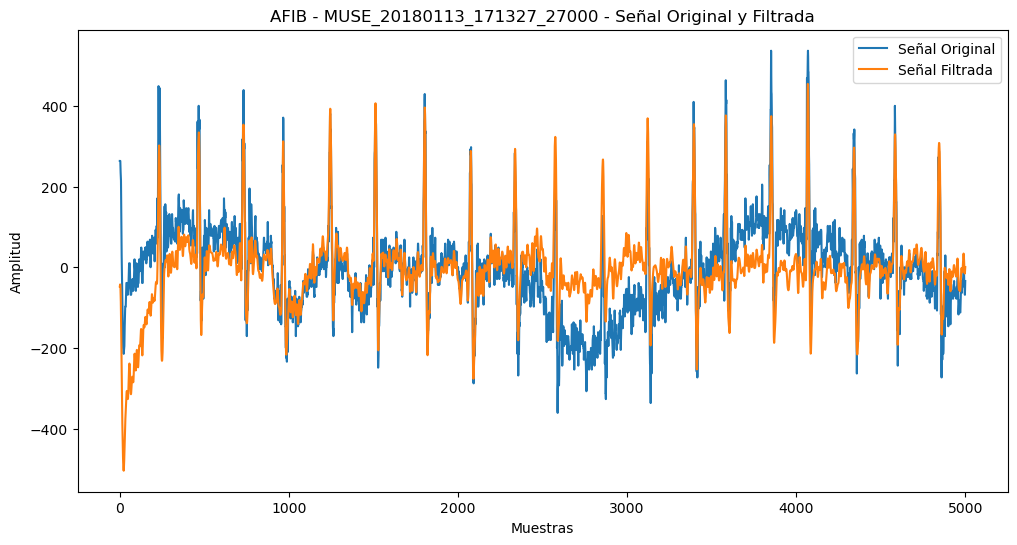

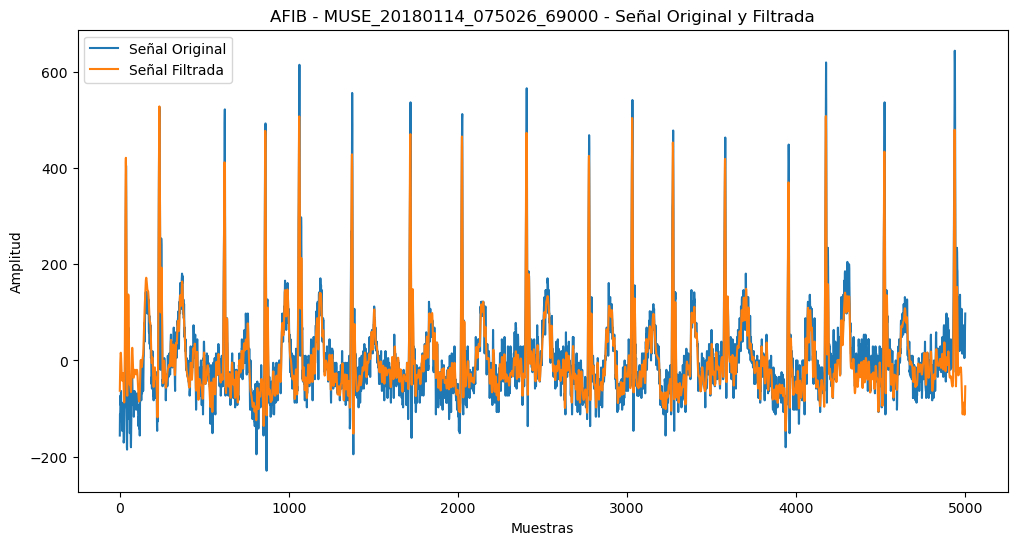

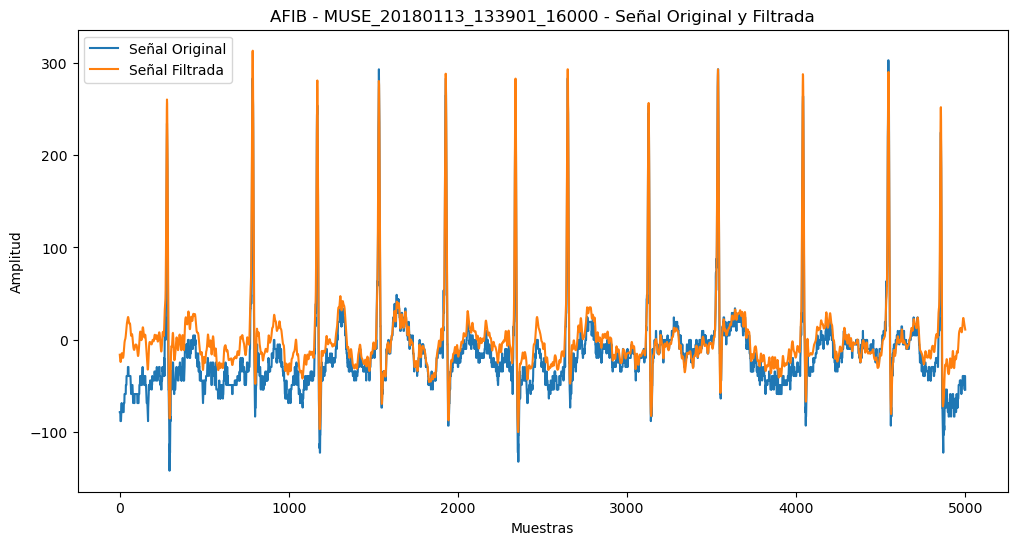

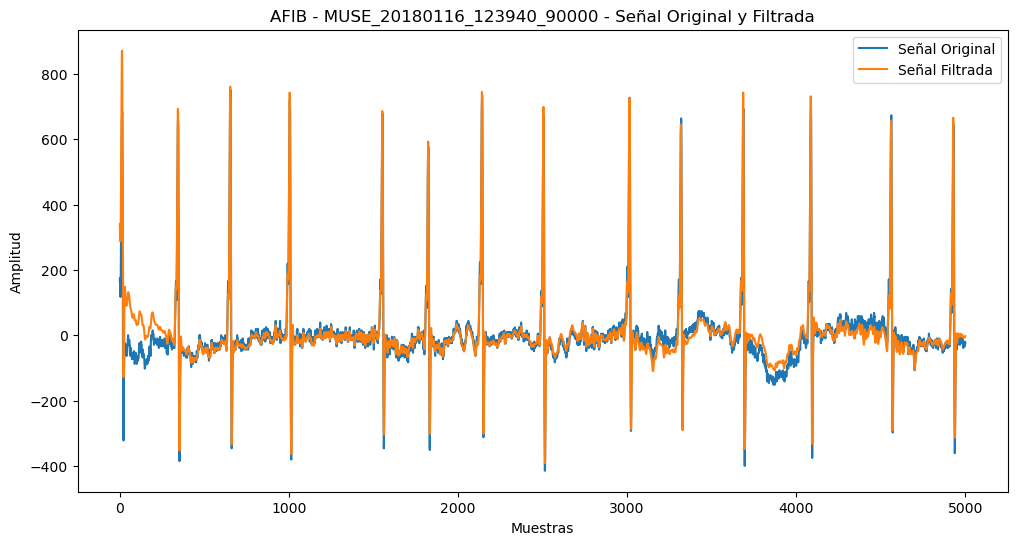

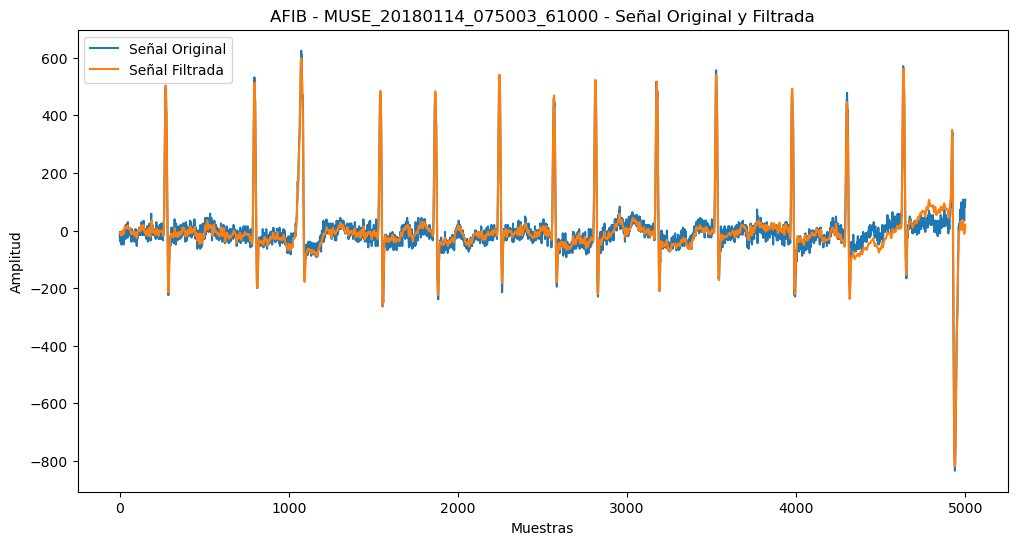

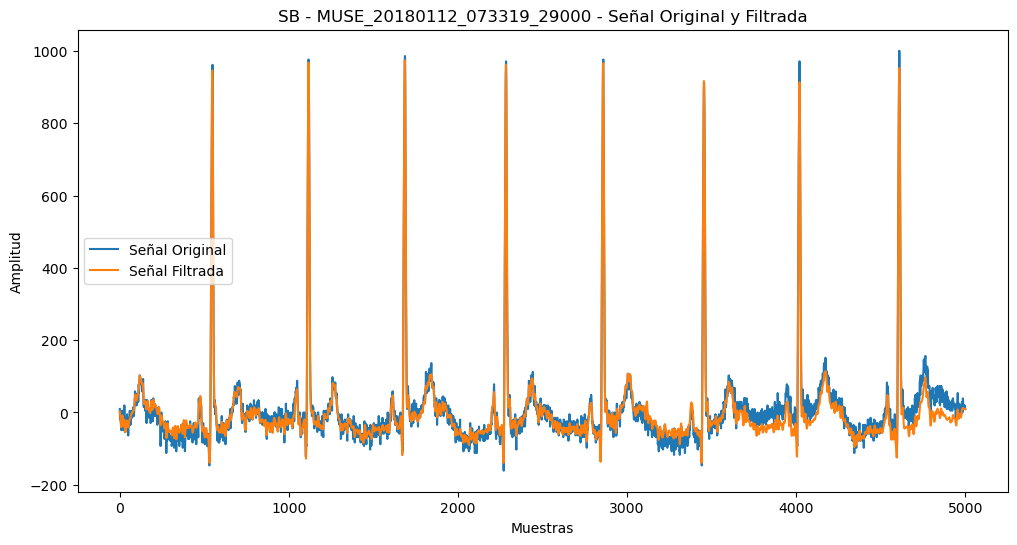

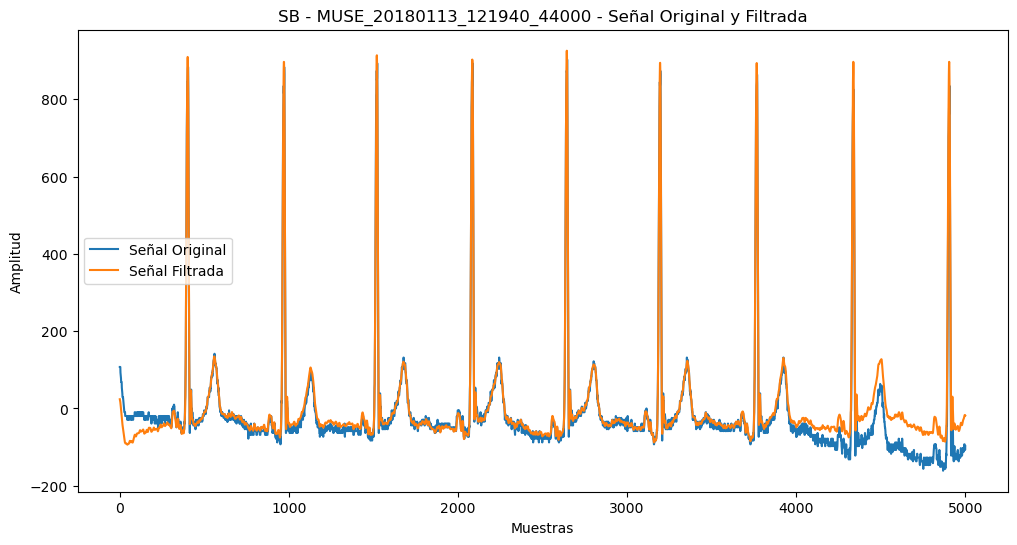

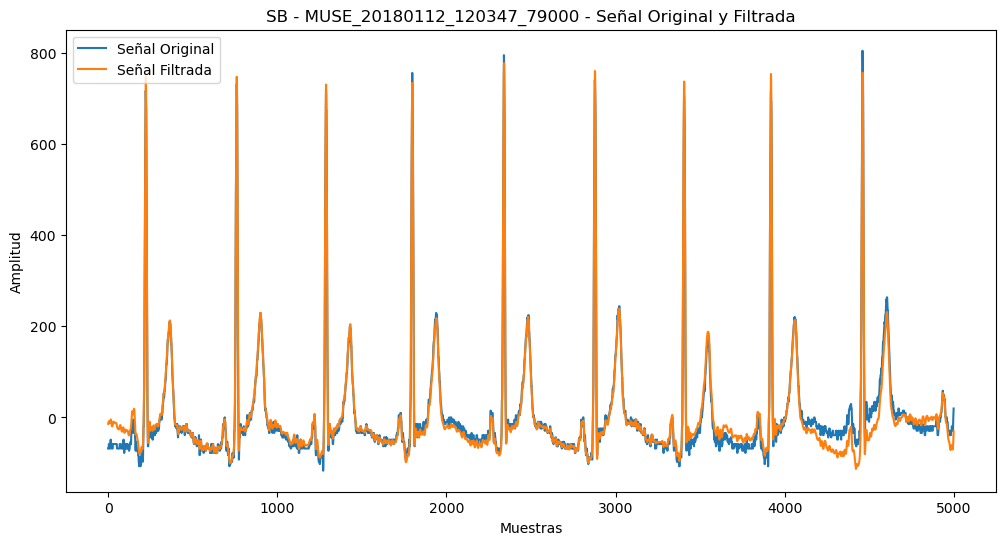

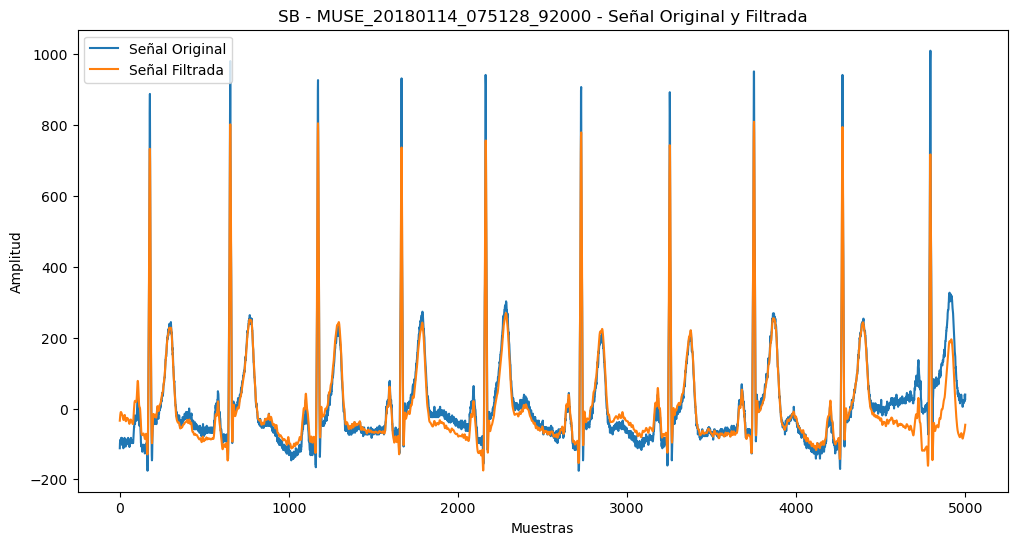

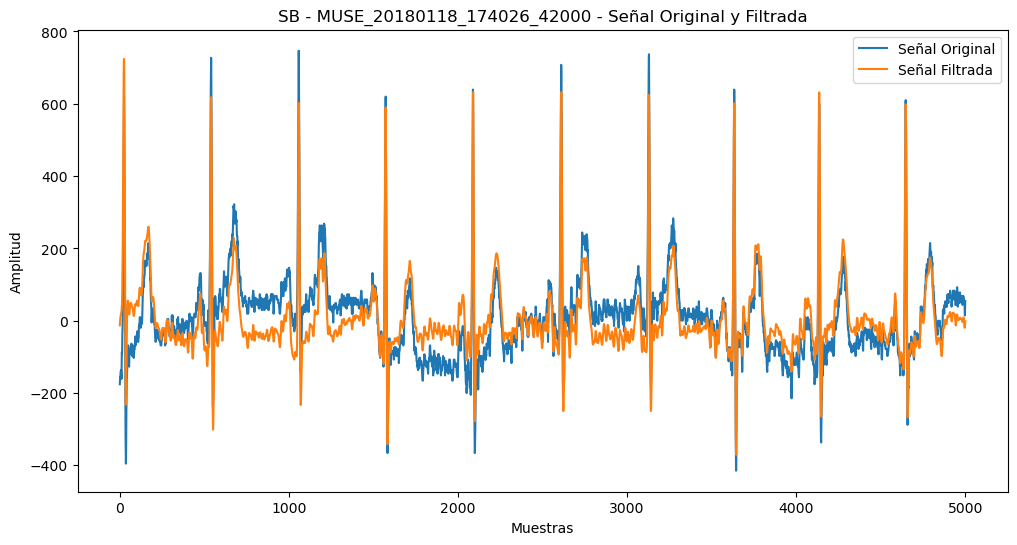

In [7]:
def high_pass_filter(signal_data, cutoff=0.5, fs=500, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    filtered_signal = signal.filtfilt(b, a, signal_data)
    return filtered_signal

def low_pass_filter(signal_data, cutoff=50, fs=500, order=40):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b = signal.firwin(order, normal_cutoff)
    filtered_signal = signal.filtfilt(b, [1.0], signal_data)
    return filtered_signal

# Función para procesar todas las señales
def process_all_signals(AFIB_xn, SB_xn):
    # Procesar todas las señales de AFIB
    for AFIB_name, AFIB_signal in AFIB_xn.items():
        # Asegurarse de que la señal sea un ndarray
        AFIB_signal = np.asarray(AFIB_signal)
        
        filtered_signal_highpass = high_pass_filter(AFIB_signal, cutoff=0.5, fs=500, order=4)
        final_filtered_signal = low_pass_filter(filtered_signal_highpass, cutoff=50, fs=500, order=40)        
        
        # Mostrar la señal original y procesada
        plt.figure(figsize=(12, 6))
        plt.plot(AFIB_signal, label='Señal Original')  # Usar AFIB_signal
        plt.plot(final_filtered_signal, label='Señal Filtrada')
        plt.legend()
        plt.xlabel("Muestras")
        plt.ylabel("Amplitud")
        plt.title(f"AFIB - {AFIB_name} - Señal Original y Filtrada")
        plt.show()

    # Procesar todas las señales de SB
    for SB_name, SB_signal in SB_xn.items():
        # Asegurarse de que la señal sea un ndarray
        SB_signal = np.asarray(SB_signal)
        
        filtered_signal_highpass = high_pass_filter(SB_signal, cutoff=0.5, fs=500, order=4)
        final_filtered_signal = low_pass_filter(filtered_signal_highpass, cutoff=50, fs=500, order=40)
        
        # Mostrar la señal original y procesada
        plt.figure(figsize=(12, 6))
        plt.plot(SB_signal, label='Señal Original')  # Usar SB_signal
        plt.plot(final_filtered_signal, label='Señal Filtrada')
        plt.legend()
        plt.xlabel("Muestras")
        plt.ylabel("Amplitud")
        plt.title(f"SB - {SB_name} - Señal Original y Filtrada")
        plt.show()

# Llamada a la función para procesar las señales
process_all_signals(AFIB_reducido, SB_reducido)

# Justificación de parametros

En el caso del high_pass_filter (filtro pasa altas) utilizado en el flujo 1 y 3, se utiliza un filtro pasa-altas de tipo IIR (Butterworth). Los filtros IIR, requieren menos coeficientes que los filtros FIR para alcanzar un nivel de atenuación y respuesta de fase similar, lo cual es útil para minimizar el uso de memoria y procesamiento en tiempo real [3]. Se ha especificado un orden bajo (order=2), que en un filtro Butterworth da una pendiente suave en la región de transición. Esto ayuda a filtrar solo las frecuencias más bajas sin afectar demasiado las componentes de mayor frecuencia. En aplicaciones como señales fisiológicas (ej., ECG), este tipo de filtro es útil para eliminar frecuencias de baja frecuencia (por ejemplo, fluctuaciones de la línea base) sin afectar significativamente la señal de interés [3]. Se usó una frecuencia de corte de 0.5 Hz (cutoff=0.5 Hz) valor que es un requerimiento en el informe, el cual se caracteriza por filtrar componentes de muy baja frecuencia (por ejemplo, movimiento de base en señales de ECG o respiración lenta). Se escogió una frecuencia de muestreo de 500 Hz (fs=500 Hz) esta frecuencia fue seleccionada con base _Analysis of sampling frequency and resolution in ECG signals_ en el cual seleccionan un rango optimo de frecuencias para el análisis de señales de ECG [5].

Por otro lado, el low_pass_filter se utiliza un filtro pasa-bajas FIR. Los filtros FIR pueden diseñarse para tener una respuesta de fase lineal, lo que significa que no distorsionan la forma de onda de la señal en el dominio del tiempo. Esto es especialmente importante en señales donde la integridad de la forma de la onda es crítica, como en ECG, donde la forma de las ondas (P, QRS, T) contiene información diagnóstica relevante [4]. Los filtros FIR permiten un mejor control de la respuesta en frecuencia, lo que facilita diseñar un filtro con un corte más abrupto. Esto es útil para evitar que las frecuencias no deseadas se mantengan en la señal final. Además los filtros FIR son inherentemente estables, lo cual es una ventaja en aplicaciones de procesamiento de señales, ya que no existe riesgo de inestabilidad con órdenes elevados, en contraste con los filtros IIR [4]. La frecuencia de corte de 50 Hz(cutoff=50 Hz) fue seleccionado según los requerimientos del proyecto, esta frecuencia se caracteriza por eliminar componentes de alta frecuencia no deseadas, manteniendo las frecuencias por debajo de 50 Hz. En aplicaciones como ECG, los componentes de interés generalmente están por debajo de los 40-50 Hz, por lo que este corte es adecuado para eliminar el ruido de alta frecuencia (por ejemplo, ruido electromagnético de 60 Hz). Se selecciono una frecuencia de muestreo de 500 Hz (fs=1000 Hz) por la razón mencioanada anteriormente. Y en cuanto al orden, se escogió un orden de 40 (order=40) los filtros FIR requieren un orden mayor para lograr una transición abrupta en la frecuencia de corte, un orden de 40 proporciona un buen equilibrio entre eficiencia computacional y una atenuación adecuada de las frecuencias superiores a 50 Hz.

# Analisis de cada flujo

Flujo 1 (Filtro pasa-altas, filtro pasa-bajas, filtro wavelet Daubechies): En el flujo 1, la señal ECG original y la señal filtrada presentan similitudes en cuanto a su forma y características principales, lo que indica que el ruido de alta y baja frecuencia ha sido atenuado de manera efectiva. La señal filtrada adopta un aspecto común de señales ECG, sin embargo, este flujo presenta un problema notable: la señal filtrada exhibe un offset variable en el eje horizontal, es decir, su línea base no se mantiene constante en cero. Esta línea de base se desplaza de manera similar a una onda sinusoidal, lo cual es un inconveniente importante. Este desplazamiento no lineal en la línea de base dificulta la interpretación clínica, ya que podría complicar el análisis de variaciones sutiles en las amplitudes y la posición de los picos, lo cual es crítico para el diagnóstico de arritmias y otras condiciones cardíacas. Por lo tanto, aunque el filtrado es efectivo, el desplazamiento de la línea de base resta precisión y confiabilidad al análisis de la señal ECG en este flujo.

Flujo 2 (Detrend, filtro pasa-bajas, filtro wavelet Daubechies): El flujo 2 presenta una señal filtrada que sigue de cerca el comportamiento de la señal original, mostrando una forma o curva mucho más definida y clara gracias a la reducción efectiva del ruido de alta frecuencia. Además, el procesamiento de Detrend aplicado en este flujo alinea toda la señal filtrada de modo que su línea de base se centra en cero. Esto no solo mejora la estética de la señal, sino que aporta beneficios importantes en el análisis y procesamiento de datos. Una señal centrada en cero simplifica la interpretación de parámetros estadísticos, al eliminar el riesgo de interpretar errores de desplazamiento en el eje como parte de la señal. Este centrado es particularmente beneficioso al comparar señales de diferentes pacientes o al identificar patrones específicos de enfermedades o peculiaridades en el ECG, como en el caso de la fibrilación auricular (AFIB) o la bradicardia sinusal (SB), en los que es crucial tener una línea base clara y estable (con el objetivo de resaltar las variaciones de amplitud de la señal en los diferentes complejos del ECG). Además, la señal obtenida en este flujo luce significativamente "limpia", lo que facilita una posible diferenciación visual entre pacientes control y aquellos con afecciones cardíacas.

Flujo 3 (Filtro pasa-altas, filtro pasa-bajas): En el flujo 3, la señal filtrada mantiene un patrón similar al de la señal original, pero la señal filtrada sigue teniendo evidencia de ruido de alta frecuencia a traves de toda la señal, este flujo de procesamiento tiene ciertas limitaciones importantes. La amplitud de la señal filtrada presenta variaciones que en algunos puntos difieren significativamente de la señal original, afectando su precisión. Además, existe una tendencia lineal en el eje horizontal que no es completamente eliminada, y la señal filtrada no está centrada en cero. La falta de alineación en cero, la variabilidad en la amplitud sumado al ruido de alta frecuencia comprometen la consistencia de los resultados, lo que podría inducir errores al analizar características específicas de la señal ECG, especialmente cuando se necesita precisión en la evaluación de los intervalos y amplitudes de los picos. Esto hace que el flujo 3 sea menos adecuado para un análisis clínico detallado, donde la estabilidad de la línea de base y la precisión en amplitud son cruciales.

En conclusión, el flujo que mejor procesa las señales de ECG es el flujo 2, con el cual se seguirá trabajando el resto de señales en los siguientes analisis.

# Aplicar Flujo 2 al resto de datos, calcular fMP y creación del Dataframe

In [8]:
def compression(c_tk, x_min, x_max):
    s_tk = (c_tk - x_min) / (x_max - x_min)
    return s_tk

def extract_max_power_frequency(signal_data, fs=500):
    # Calcular la densidad espectral de potencia usando el método de Welch
    frequencies, psd = signal.welch(signal_data, fs=fs)
    # Encontrar la frecuencia con la máxima potencia
    max_power_index = np.argmax(psd)
    max_power_frequency = frequencies[max_power_index]
    return max_power_frequency

def process_all_signals(AFIB_xn, SB_xn):
    # Lista para almacenar los resultados
    results = []

    # Procesar todas las señales de AFIB
    for AFIB_name, AFIB_signal in AFIB_xn.items():
        # Asegurarse de que la señal sea un ndarray
        AFIB_signal = np.asarray(AFIB_signal)
        
        detrended_signal = apply_detrend(AFIB_signal)
        x_min = np.min(detrended_signal)
        x_max = np.max(detrended_signal)
        compressed_signal = compression(detrended_signal, x_min, x_max)
        detrended_signal2 = apply_detrend(compressed_signal)
        filtered_signal_wavelet = modified_wavelet_filter(detrended_signal2, wavelet='db4', level=8)
        final_filtered_signal = low_pass_filter(filtered_signal_wavelet, cutoff=50, fs=500)
        
        # Extraer la frecuencia con la máxima potencia
        max_power_frequency_AFIB = extract_max_power_frequency(final_filtered_signal, fs=500)
        # Agregar los resultados a la lista
        results.append({'Registro': AFIB_name, 'Estado': 'AFIB', 'fMP': max_power_frequency_AFIB})

    # Procesar todas las señales de SB
    for SB_name, SB_signal in SB_xn.items():
        # Asegurarse de que la señal sea un ndarray
        SB_signal = np.asarray(SB_signal)
        
        detrended_signal = apply_detrend(SB_signal)
        x_min = np.min(detrended_signal)
        x_max = np.max(detrended_signal)
        compressed_signal = compression(detrended_signal, x_min, x_max)
        detrended_signal2 = apply_detrend(compressed_signal)
        filtered_signal_wavelet = modified_wavelet_filter(detrended_signal2, wavelet='db4', level=8)
        final_filtered_signal = low_pass_filter(filtered_signal_wavelet, cutoff=50, fs=500)

        # Extraer la frecuencia con la máxima potencia
        max_power_frequency_SB = extract_max_power_frequency(final_filtered_signal, fs=500)
        # Agregar los resultados a la lista
        results.append({'Registro': SB_name, 'Estado': 'SB', 'fMP': max_power_frequency_SB})

    # Crear un DataFrame a partir de los resultados
    df_results = pd.DataFrame(results)
    return df_results

# Llamada a la función para procesar las señales
df_results = process_all_signals(AFIB_values, SB_values)

# Mostrar el DataFrame resultante
print(df_results)

                        Registro Estado        fMP
0     MUSE_20180113_171327_27000   AFIB  11.718750
1     MUSE_20180114_075026_69000   AFIB  13.671875
2     MUSE_20180113_133901_16000   AFIB  11.718750
3     MUSE_20180116_123940_90000   AFIB  11.718750
4     MUSE_20180114_075003_61000   AFIB  11.718750
...                          ...    ...        ...
5664  MUSE_20180114_070348_17000     SB   9.765625
5665  MUSE_20180114_134724_10000     SB   9.765625
5666  MUSE_20180113_122544_20000     SB   9.765625
5667  MUSE_20180114_074720_85000     SB   9.765625
5668  MUSE_20180116_133908_01000     SB   1.953125

[5669 rows x 3 columns]


# Comparacion con el dataframe obtenido en el proyecto 2 (fMP_csv)

In [9]:
# Cargar dataframe obtenido en el proyecto 2
df_csv = pd.read_csv('Dataframe.csv')
# Seleccionar las columnas 'Registro', 'Estado', 'fMP'
df_csv_subset = df_csv[['Registro', 'Estado', 'fMP']]
# Hacer un merge entre ambos DataFrames basado en 'Registro' y 'Estado'
df_merged = pd.merge(df_csv_subset, df_results, on=['Registro', 'Estado'], suffixes=('_Proyecto2', '_Proyecto3'))

# Crear una columna que identifique si fMP en ambos DataFrames es igual
df_merged['fMP_match'] = df_merged['fMP_Proyecto2'] == df_merged['fMP_Proyecto3']

# Filtrar las filas donde fMP no coincide
df_differences = df_merged[df_merged['fMP_match'] == False]

print("Diferencias encontradas en fMP:")
print(df_differences[['Registro', 'Estado', 'fMP_Proyecto2', 'fMP_Proyecto3']])

Diferencias encontradas en fMP:
                        Registro Estado  fMP_Proyecto2  fMP_Proyecto3
0     MUSE_20180113_171327_27000   AFIB           13.0      11.718750
1     MUSE_20180114_075026_69000   AFIB            5.0      13.671875
2     MUSE_20180113_133901_16000   AFIB            3.0      11.718750
3     MUSE_20180116_123940_90000   AFIB           12.0      11.718750
4     MUSE_20180114_075003_61000   AFIB           11.0      11.718750
...                          ...    ...            ...            ...
5664  MUSE_20180114_070348_17000     SB            8.0       9.765625
5665  MUSE_20180114_134724_10000     SB            4.0       9.765625
5666  MUSE_20180113_122544_20000     SB            4.0       9.765625
5667  MUSE_20180114_074720_85000     SB           11.0       9.765625
5668  MUSE_20180116_133908_01000     SB            9.0       1.953125

[5669 rows x 4 columns]


# Análisis estadístico

In [10]:
print("Estadísticas descriptivas para fMP_Proyecto2:")
print(df_merged['fMP_Proyecto2'].describe())
print("\nEstadísticas descriptivas para fMP_Proyecto3:")
print(df_merged['fMP_Proyecto3'].describe())

# Calcular la diferencia entre las dos columnas
df_merged['fMP_difference'] = df_merged['fMP_Proyecto2'] - df_merged['fMP_Proyecto3']
print("\nEstadísticas descriptivas de las diferencias (fMP_Proyecto2 - fMP_Proyecto3):")
print(df_merged['fMP_difference'].describe())

Estadísticas descriptivas para fMP_Proyecto2:
count    5669.000000
mean        4.522667
std         2.808092
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        50.000000
Name: fMP_Proyecto2, dtype: float64

Estadísticas descriptivas para fMP_Proyecto3:
count    5669.000000
mean        9.591294
std         3.578290
min         1.953125
25%         7.812500
50%         9.765625
75%        11.718750
max        31.250000
Name: fMP_Proyecto3, dtype: float64

Estadísticas descriptivas de las diferencias (fMP_Proyecto2 - fMP_Proyecto3):
count    5669.000000
mean       -5.068627
std         4.233215
min       -25.343750
25%        -7.718750
50%        -5.718750
75%        -2.765625
max        48.046875
Name: fMP_difference, dtype: float64


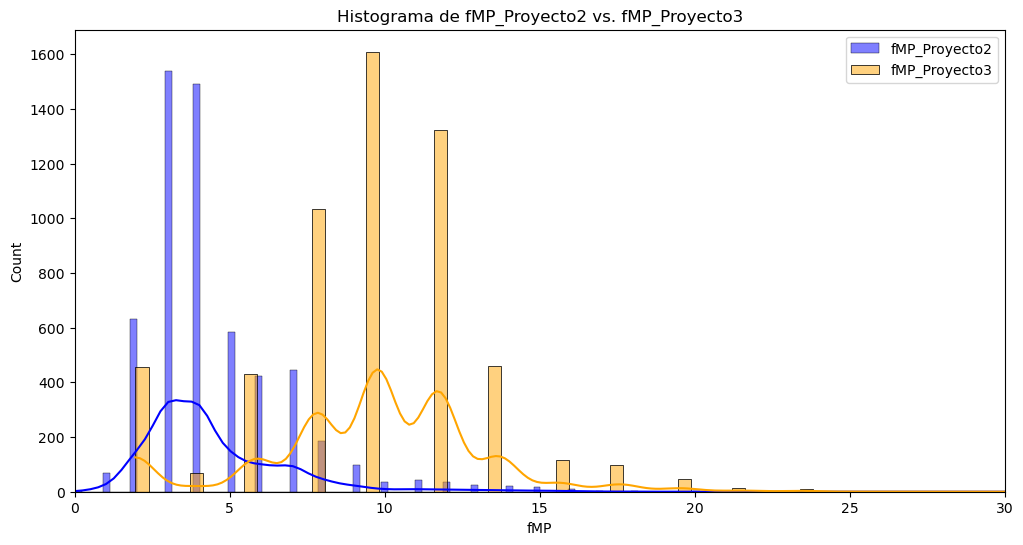

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(df_merged['fMP_Proyecto2'], color="blue", label="fMP_Proyecto2", kde=True)
sns.histplot(df_merged['fMP_Proyecto3'], color="orange", label="fMP_Proyecto3", kde=True)
plt.title("Histograma de fMP_Proyecto2 vs. fMP_Proyecto3")
plt.xlabel("fMP")
plt.xlim(0, 30)
plt.legend()
plt.show()

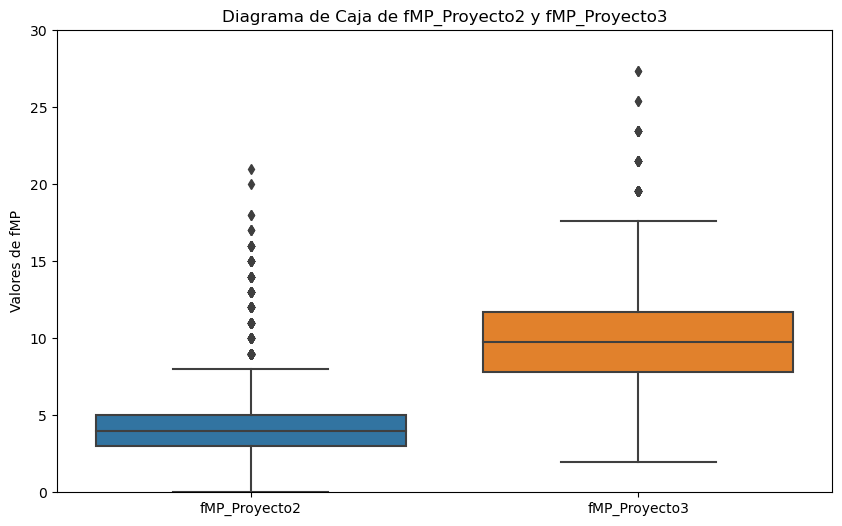

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged[['fMP_Proyecto2', 'fMP_Proyecto3']])
plt.title("Diagrama de Caja de fMP_Proyecto2 y fMP_Proyecto3")
plt.ylabel("Valores de fMP")
plt.xticks([0, 1], ["fMP_Proyecto2", "fMP_Proyecto3"])
plt.ylim(0, 30)
plt.show()

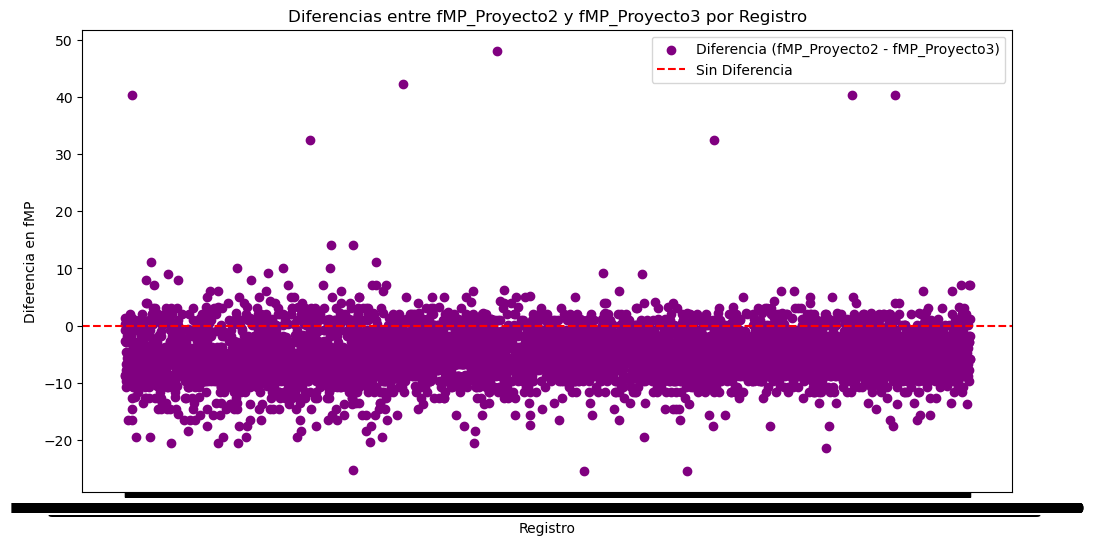

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(df_merged['Registro'], df_merged['fMP_difference'], color='purple', label="Diferencia (fMP_Proyecto2 - fMP_Proyecto3)")
plt.axhline(0, color='red', linestyle='--', label="Sin Diferencia")
plt.title("Diferencias entre fMP_Proyecto2 y fMP_Proyecto3 por Registro")
plt.xlabel("Registro")
plt.ylabel("Diferencia en fMP")
plt.legend()
plt.show()

In [14]:
# Prueba de Shapiro-Wilk para normalidad
stat, p_value = shapiro(df_merged['fMP_difference'])
print("Prueba de Shapiro-Wilk para normalidad:")
print(f"Estadístico = {stat}, p-valor = {p_value}")
if p_value > 0.05:
    print("Las diferencias parecen seguir una distribución normal.")
else:
    print("Las diferencias no parecen seguir una distribución normal.")

Prueba de Shapiro-Wilk para normalidad:
Estadístico = 0.9148687198804699, p-valor = 9.675474646169928e-49
Las diferencias no parecen seguir una distribución normal.


C:\Users\santi\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5669.
  res = hypotest_fun_out(*samples, **kwds)


In [15]:
# Prueba t de muestras relacionadas
stat, p_value = ttest_rel(df_merged['fMP_Proyecto2'], df_merged['fMP_Proyecto3'])
print("\nPrueba t de muestras relacionadas:")
print(f"Estadístico = {stat}, p-valor = {p_value}")
if p_value < 0.05:
    print("Hay una diferencia significativa entre fMP_csv y fMP_results.")
else:
    print("No hay una diferencia significativa entre fMP_csv y fMP_results.")


Prueba t de muestras relacionadas:
Estadístico = -90.15155876680343, p-valor = 0.0
Hay una diferencia significativa entre fMP_csv y fMP_results.


In [16]:
# Prueba de Wilcoxon para diferencias de fMP
stat, p_value = wilcoxon(df_merged['fMP_Proyecto2'], df_merged['fMP_Proyecto3'])
print("\nPrueba de Wilcoxon:")
print(f"Estadístico = {stat}, p-valor = {p_value}")
if p_value < 0.05:
    print("Hay una diferencia significativa entre fMP_csv y fMP_results.")
else:
    print("No hay una diferencia significativa entre fMP_csv y fMP_results.")


Prueba de Wilcoxon:
Estadístico = 638861.0, p-valor = 0.0
Hay una diferencia significativa entre fMP_csv y fMP_results.


# Comparacion AFIB y SB - Proyecto 2 (csv) vs Proyecto 3 (results)

In [17]:
# Filtrar los datos según el estado
afib_data = df_merged[df_merged['Estado'] == 'AFIB']
sb_data = df_merged[df_merged['Estado'] == 'SB']

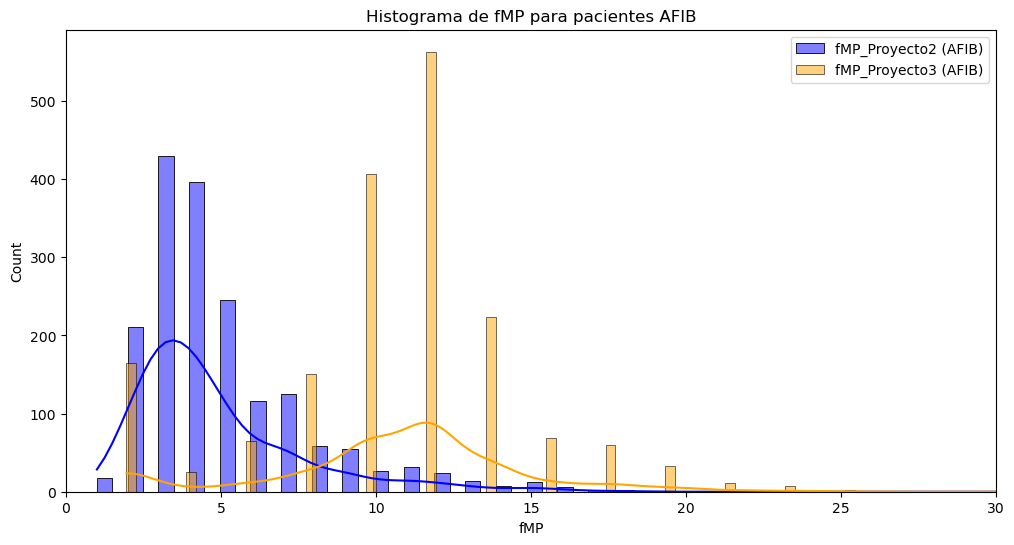

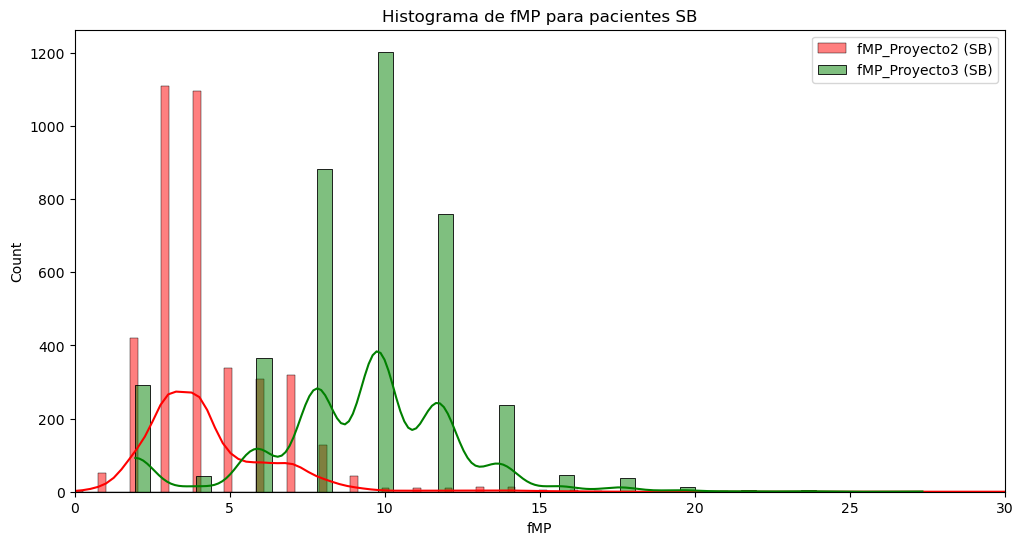

In [18]:
# Histograma para AFIB
plt.figure(figsize=(12, 6))
sns.histplot(afib_data['fMP_Proyecto2'], color="blue", label="fMP_Proyecto2 (AFIB)", kde=True)
sns.histplot(afib_data['fMP_Proyecto3'], color="orange", label="fMP_Proyecto3 (AFIB)", kde=True)
plt.title("Histograma de fMP para pacientes AFIB")
plt.xlabel("fMP")
plt.xlim(0, 30)
plt.legend()
plt.show()

# Histograma para SB
plt.figure(figsize=(12, 6))
sns.histplot(sb_data['fMP_Proyecto2'], color="red", label="fMP_Proyecto2 (SB)", kde=True)
sns.histplot(sb_data['fMP_Proyecto3'], color="green", label="fMP_Proyecto3 (SB)", kde=True)
plt.title("Histograma de fMP para pacientes SB")
plt.xlabel("fMP")
plt.xlim(0, 30)
plt.legend()
plt.show()

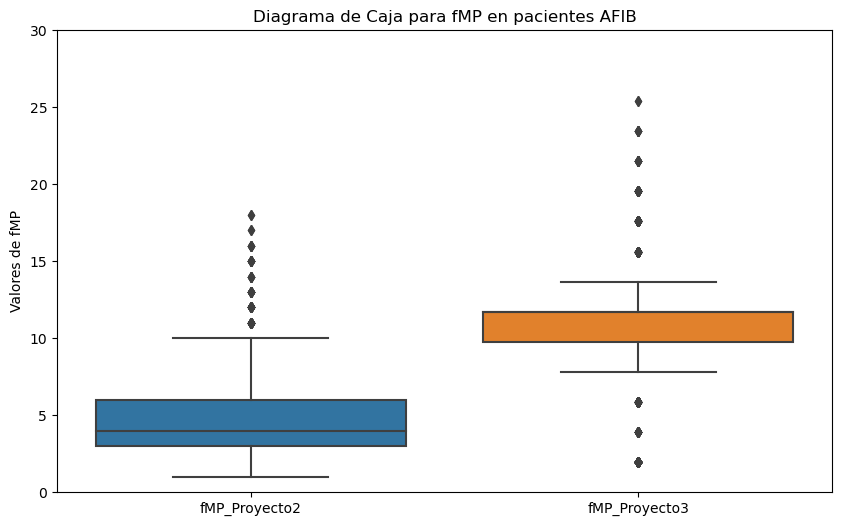

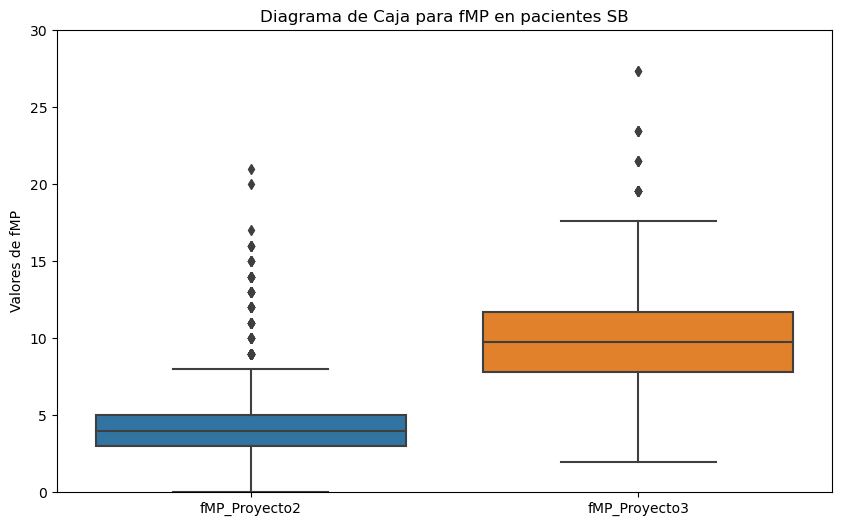

In [19]:
# Box plot para AFIB
plt.figure(figsize=(10, 6))
sns.boxplot(data=afib_data[['fMP_Proyecto2', 'fMP_Proyecto3']])
plt.title("Diagrama de Caja para fMP en pacientes AFIB")
plt.ylabel("Valores de fMP")
plt.ylim(0, 30)
plt.xticks([0, 1], ["fMP_Proyecto2", "fMP_Proyecto3"])
plt.show()

# Box plot para SB
plt.figure(figsize=(10, 6))
sns.boxplot(data=sb_data[['fMP_Proyecto2', 'fMP_Proyecto3']])
plt.title("Diagrama de Caja para fMP en pacientes SB")
plt.ylabel("Valores de fMP")
plt.ylim(0, 30)
plt.xticks([0, 1], ["fMP_Proyecto2", "fMP_Proyecto3"])
plt.show()

In [20]:
# Estadísticas descriptivas para AFIB
print("Estadísticas descriptivas para AFIB en fMP_Proyecto2:")
print(afib_data['fMP_Proyecto2'].describe())
print("\nEstadísticas descriptivas para AFIB en fMP_Proyecto3:")
print(afib_data['fMP_Proyecto3'].describe())

# Estadísticas descriptivas para SB
print("\nEstadísticas descriptivas para SB en fMP_Proyecto2:")
print(sb_data['fMP_Proyecto2'].describe())
print("\nEstadísticas descriptivas para SB en fMP_Proyecto3:")
print(sb_data['fMP_Proyecto3'].describe())

Estadísticas descriptivas para AFIB en fMP_Proyecto2:
count    1780.000000
mean        4.878652
std         3.118585
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        50.000000
Name: fMP_Proyecto2, dtype: float64

Estadísticas descriptivas para AFIB en fMP_Proyecto3:
count    1780.000000
mean       10.586376
std         4.092215
min         1.953125
25%         9.765625
50%        11.718750
75%        11.718750
max        31.250000
Name: fMP_Proyecto3, dtype: float64

Estadísticas descriptivas para SB en fMP_Proyecto2:
count    3889.000000
mean        4.359733
std         2.638340
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        50.000000
Name: fMP_Proyecto2, dtype: float64

Estadísticas descriptivas para SB en fMP_Proyecto3:
count    3889.000000
mean        9.135844
std         3.216038
min         1.953125
25%         7.812500
50%         9.765625
75%        11.718750
max        27.343750
Name:

In [22]:
# Prueba de Shapiro-Wilk para AFIB
stat_afib, p_value_afib = shapiro(afib_data['fMP_Proyecto2'] - afib_data['fMP_Proyecto3'])
print("\nPrueba de Shapiro-Wilk para normalidad (AFIB):")
print(f"Estadístico = {stat_afib}, p-valor = {p_value_afib}")
if p_value_afib > 0.05:
    print("Las diferencias para AFIB parecen seguir una distribución normal.")
else:
    print("Las diferencias para AFIB no parecen seguir una distribución normal.")

# Prueba de Shapiro-Wilk para SB
stat_sb, p_value_sb = shapiro(sb_data['fMP_Proyecto2'] - sb_data['fMP_Proyecto3'])
print("\nPrueba de Shapiro-Wilk para normalidad (SB):")
print(f"Estadístico = {stat_sb}, p-valor = {p_value_sb}")
if p_value_sb > 0.05:
    print("Las diferencias para SB parecen seguir una distribución normal.")
else:
    print("Las diferencias para SB no parecen seguir una distribución normal.")


Prueba de Shapiro-Wilk para normalidad (AFIB):
Estadístico = 0.9361119533161187, p-valor = 5.501811915106556e-27
Las diferencias para AFIB no parecen seguir una distribución normal.

Prueba de Shapiro-Wilk para normalidad (SB):
Estadístico = 0.895921778224646, p-valor = 1.8771972503493014e-45
Las diferencias para SB no parecen seguir una distribución normal.


In [23]:
# Pruebas para AFIB
if p_value_afib > 0.05:
    # Prueba t de muestras relacionadas
    stat, p_value = ttest_rel(afib_data['fMP_Proyecto2'], afib_data['fMP_Proyecto3'])
    print("\nPrueba t de muestras relacionadas (AFIB):")
else:
    # Prueba de Wilcoxon
    stat, p_value = wilcoxon(afib_data['fMP_Proyecto2'], afib_data['fMP_Proyecto3'])
    print("\nPrueba de Wilcoxon (AFIB):")

print(f"Estadístico = {stat}, p-valor = {p_value}")
if p_value < 0.05:
    print("Hay una diferencia significativa entre fMP_csv y fMP_results para pacientes AFIB.")
else:
    print("No hay una diferencia significativa entre fMP_csv y fMP_results para pacientes AFIB.")

# Pruebas para SB
if p_value_sb > 0.05:
    # Prueba t de muestras relacionadas
    stat, p_value = ttest_rel(sb_data['fMP_Proyecto2'], sb_data['fMP_Proyecto3'])
    print("\nPrueba t de muestras relacionadas (SB):")
else:
    # Prueba de Wilcoxon
    stat, p_value = wilcoxon(sb_data['fMP_Proyecto2'], sb_data['fMP_Proyecto3'])
    print("\nPrueba de Wilcoxon (SB):")

print(f"Estadístico = {stat}, p-valor = {p_value}")
if p_value < 0.05:
    print("Hay una diferencia significativa entre fMP_csv y fMP_results para pacientes SB.")
else:
    print("No hay una diferencia significativa entre fMP_csv y fMP_results para pacientes SB.")


Prueba de Wilcoxon (AFIB):
Estadístico = 73056.0, p-valor = 2.0392495688212796e-241
Hay una diferencia significativa entre fMP_csv y fMP_results para pacientes AFIB.

Prueba de Wilcoxon (SB):
Estadístico = 269644.0, p-valor = 0.0
Hay una diferencia significativa entre fMP_csv y fMP_results para pacientes SB.


# Resultados

# Comparación general entre la fMP obtenidos en el proyecto 2 y en el proyecto 3

El análisis de las estadísticas descriptivas entre fMP_Proyecto2 y fMP_Proyecto3 revela diferencias notables tanto en la media como en la dispersión. En fMP_Proyecto2, la media es de 4.52 con una desviación estándar de 2.8, mientras que en fMP_Proyecto3, la media aumenta a 9.59 con una desviación estándar de 3.57. Este incremento en la media y la mayor dispersión en fMP_Proyecto3 indican que el proceso de filtrado utilizado en este proyecto (proyecto 3) no solo atenúa el ruido, sino que podría estar introduciendo una amplificación en la señal o sobreestimando ciertos valores de frecuencia máxima de potencia (fMP). Este comportamiento ha sido reportado en estudios previos que señalan cómo algunos métodos de filtrado pueden sesgar los resultados al resaltar componentes específicos de la señal (por ejemplo, picos de frecuencia) que no reflejan fielmente la fisiología del paciente. Las distribuciones también muestran diferencias en sus percentiles: en fMP_Proyecto2, el 75% de los valores son menores o iguales a 5, mientras que en fMP_results, el 75% de los valores alcanzan hasta 11.71. Este desplazamiento hacia valores más altos puede influir en la interpretación clínica de los resultados, ya que, según investigaciones previas, los valores elevados de fMP están asociados a condiciones patológicas específicas y la sobreestimación podría llevar a una clasificación incorrecta de los pacientes .

La diferencia entre ambas series, calculada como fMP_Proyecto2 - fMP_Proyecto3, es de -5.06, y su desviación estándar de 4.23 indica una variabilidad considerable. Las pruebas de normalidad (Shapiro-Wilk) realizadas a estas diferencias arrojaron un p-valor extremadamente bajo, justificando el uso de pruebas no paramétricas. Tanto la prueba t para muestras relacionadas como la prueba de Wilcoxon arrojaron p-valores de 0.0, indicando una diferencia estadísticamente significativa [14]. Esto resalta la necesidad de evaluar y validar los métodos de procesamiento de señales en contextos clínicos, ya que las diferencias pueden tener consecuencias importantes en el diagnóstico y la monitorización de enfermedades cardíacas [6].

El histograma y el diagrama de caja y bigotes visualizan claramente estas diferencias. La distribución de fMP_Proyecto2 está centrada en valores más bajos (0 a 5), mientras que fMP_Proyecto3 presenta una mayor frecuencia de valores entre 8 y 12, con picos en 9.76 y 11.72. En conjunto, estos gráficos apoyan la conclusión de que la metodología aplicada en el proyecto 3 eleva los valores de fMP, lo que puede deberse a un aumento en la amplitud de componentes específicos de la señal ECG. Esta diferencia observada podría implicar que el método de filtrado actual no es óptimo para un análisis clínico riguroso, pues distorsiona los resultados de una manera que podría inducir a error en la interpretación médica.

# Comparación entre AFIB y SB del proyecto 2 y proyecto 3

## Pacientes con Fibrilación Auricular (AFIB)

En pacientes con fibrilación auricular, las estadísticas descriptivas entre fMP_Proyecto2 y fMP_Proyecto3 reflejan una diferencia aún más pronunciada que en el análisis general. La media en fMP_Proyecto2 es de 4.87 con una desviación estándar de 3.11, mientras que en fMP_Proyecto3, la media asciende a 10.58 y la desviación estándar a 4.09. Esto indica que el procesamiento de señal aplicado en el proyecto 3 aumenta tanto los valores centrales como la variabilidad de la señal en pacientes con AFIB. Esta tendencia hacia valores más altos es preocupante, ya que un fMP más elevado en estos pacientes podría interpretarse erróneamente como una mayor severidad de la arritmia, lo cual no siempre es representativo si el aumento es producto del procesamiento de señal y no de la actividad cardíaca real .

El histograma a concentración de valores de fMP en fMP_Proyecto2 alrededor de 3 a 6, mientras que en fMP_Proyecto3 los valores se desplazan hacia rangos superiores, con una moda cercana a 10. La moda elevada en fMP_Proyecto3 podría ser atribuible a técnicas de filtrado que amplifican picos específicos de la señal, posiblemente exagerando la presencia de patrones de alta frecuencia en el ECG, como se ha observado en estudios previos sobre el impacto del procesamiento en señales de fibrilación auricular .

El diagrama de caja y bigotes confirma estos hallazgos, mostrando una mediana y un rango intercuartílico mucho más altos en fMP_Proyecto3 que en fMP_Proyecto2. Los valores atípicos en fMP_Proyecto2 están concentrados por debajo de 15, mientras que en fMP_Proyecto3 se extienden hasta valores de alrededor de 25, lo que sugiere que el método de filtrado amplifica aún más los valores ya altos de la señal. La prueba de Wilcoxon confirma que esta diferencia es estadísticamente significativa (p < 0.05), lo que subraya la importancia de un filtrado preciso en el contexto de AFIB, donde pequeñas variaciones en la señal pueden tener implicaciones significativas en el manejo clínico del paciente.

## Pacientes con Bradicardia Sinusal (SB)

En pacientes con bradicardia sinusal (SB), las diferencias entre fMP_Proyecto2 y fMP_Proyecto3 siguen un patrón similar. La media de fMP_Proyecto2 es de 4.36 con una desviación estándar de 2.64, mientras que fMP_Proyecto3 presenta una media de 9.13 y una desviación estándar de 3.21. Los percentiles muestran una tendencia similar a la observada en el grupo de AFIB, con el 75% de los valores en fMP_Proyecto2 menores o iguales a 5 y en fMP_Proyecto3 hasta 11.72. Esta variación implica que el método de filtrado puede estar sesgando los resultados hacia valores más altos de fMP, lo que podría llevar a una clasificación errónea de la severidad de la bradicardia en los pacientes .

El histograma de pacientes SB que los valores de fMP_Proyecto2 se concentran en el rango de 3 a 5, mientras que fMP_Proyecto3 presenta valores significativamente mayores, con un pico alrededor de 10. Esta tendencia es consistente con el sesgo introducido por el filtrado en otros estudios, donde el uso de métodos no adaptativos tiende a exagerar ciertas características en el ECG de pacientes con ritmos lentos .

El diagrama de caja y bigotes para los pacientes SB muestra una mayor dispersión en fMP_Proyecto3, con valores atípicos que alcanzan hasta 25, mientras que en fMP_Proyecto2 los atípicos se encuentran más limitados. La prueba de Wilcoxon confirmó una diferencia estadísticamente significativa entre ambas series (p < 0.05), lo cual enfatiza que el filtrado utilizado para fMP_Proyecto3 incrementa sistemáticamente los valores de fMP, especialmente en pacientes con bradicardia. Este efecto de amplificación podría distorsionar la caracterización de los estados de bradicardia y llevar a intervenciones clínicas inapropiadas.

# Conclusiones

Los análisis estadísticos, incluyendo estadísticas descriptivas, pruebas de hipótesis y visualizaciones gráficas, revelan una discrepancia significativa entre los valores de fMP_Proyecto2 y fMP_Proyecto3. Esta diferencia sistemática sugiere que ambas series no son directamente comparables sin considerar las técnicas de procesamiento empleadas, ya que el proceso de filtrado utilizado en fMP_Proyecto3 parece amplificar los valores de fMP en comparación con fMP_Proyecto2. Esto es particularmente evidente en ambos grupos de pacientes (AFIB y SB), donde los valores de fMP_Proyecto3 muestran una tendencia hacia mayores valores promedio y mayor dispersión, lo que puede deberse a una sobreestimación causada por el filtrado. Estos hallazgos refuerzan la conclusión de que la técnica de eliminación de ruido aplicada en fMP_Proyecto3 está introduciendo un sesgo en los valores de fMP, lo que podría influir en la interpretación clínica y en el análisis de estas señales. 

Una posible fuente de esta discrepancia podría estar relacionada con el tipo de filtro y los parámetros utilizados en fMP_Proyecto3, que parecen aumentar el nivel de amplitud de la señal. Este tipo de filtrado podría estar amplificando ciertas componentes de frecuencia o introducir un sesgo en la señal, desplazándola hacia valores superiores. En comparación, fMP_Proyecto2 parece mantener valores más cercanos a los niveles originales de la señal, lo cual podría representar una estimación más conservadora y realista de los valores de fMP.  

Además del filtrado, el tratamiento de datos y los parámetros de procesamiento específicos (como el rango de frecuencias seleccionado para eliminar el ruido, el método de ajuste de línea base, y la técnica de eliminación de artefactos) también pueden haber contribuido a estas diferencias. Una elección inapropiada de parámetros de filtrado o de técnicas de detrending podría haber afectado las características de la señal de forma no deseada, amplificando componentes que no representan fielmente la señal fisiológica.

Los resultados obtenidos subrayan la necesidad de una revisión exhaustiva de las técnicas de filtrado y procesamiento utilizadas en el Proyecto 3, ya que la sobreestimación observada puede introducir sesgos importantes en el análisis clínico y diagnóstico. Para evitar interpretaciones erróneas y asegurar la consistencia de los resultados, es crucial ajustar el proceso de filtrado de modo que se minimicen estas diferencias y se mantenga la integridad de los datos originales.

# Referencias

[0] Base de datos obtenida de: https://figshare.com/collections/ChapmanECG/4560497/1

[1] “Optimal Multi-Stage Arrhythmia Classification Approach - Scientific Reports”. Nature. [En línea]. Disponible: https://www.nature.com/articles/s41598-020-59821-7

[2] B. Li y X. Chen, “Wavelet-based numerical analysis: A review and classification”, Finite Elements Anal. Des., vol. 81, pp. 14–31, abril de 2014. [En línea]. Disponible: https://doi.org/10.1016/j.finel.2013.11.001

[3] D. Chhavi Saxena, D. Avinash Sharma, D. Rahul Srivastav y D. Hemant Kumar Gupta, “Denoising of ecg signals using fir & iir filter: A performance analysis”, Int. J. Eng. & Technol., vol. 7, n.º 4.12, p. 1, octubre de 2018. [En línea]. Disponible: https://doi.org/10.14419/ijet.v7i4.12.20982

[4] M. A. Altuve. “Análisis del desempeño de filtros IIR y FIR para la reducción del desplazamiento de la línea de base del ECG en Matlab®”. Academia.edu - Find Research Papers, Topics, Researchers. [En línea]. Disponible: https://www.academia.edu/36450536/Análisis_del_desempeño_de_filtros_IIR_y_FIR_para_la_reducción_del_desplazamiento_de_la_línea_de_base_del_ECG_en_Matlab_

[5] E. Ajdaraga and M. Gusev, "Analysis of sampling frequency and resolution in ECG signals," 2017 25th Telecommunication Forum (TELFOR), Belgrade, Serbia, 2017, pp. 1-4, doi: 10.1109/TELFOR.2017.8249438.

[6] Safri, W. N. Dewi y Erwin, “Analysis of electrocardiogram recording lead II in patients with cardiovascular disease”, Enfermeria Clin., vol. 29, pp. 23–25, marzo de 2019. [En línea]. Disponible: https://doi.org/10.1016/j.enfcli.2018.11.011

[7] “7.1 Regresión local | Métodos predictivos de aprendizaje estadístico”. R Machinery. [En línea]. Disponible: https://rubenfcasal.github.io/aprendizaje_estadistico/reg-local.html

[8] “¿Qué es la regresión local Loess o Lowess?” Máxima Formación. [En línea]. Disponible: https://www.maximaformacion.es/blog-dat/que-es-la-regresion-local-loess-o-lowess/

[9] A. Buades, B. Coll y J.-M. Morel, “Non-Local means denoising”, Image Process. Line, vol. 1, septiembre de 2011. [En línea]. Disponible: https://doi.org/10.5201/ipol.2011.bcm_nlm

[10] M. P. Nageswari, U. S. Banu, K. Kumar, and S. M. Sujith, "Feature Extraction of ECG Using Daubechies Wavelet and Classification Based on Fuzzy C-Means Clustering Technique," in Proc. Nat. Conf. Control, Commun. Inf. Technol. (NCCCIT), Chennai, India, May 2013, pp. 1-6.

[11] L. Xu, D. Zhang y K. Wang, “Wavelet-Based cascaded adaptive filter for removing baseline drift in pulse waveforms”, IEEE Trans. Biomed. Eng., vol. 52, n.º 11, pp. 1973–1975, noviembre de 2005. [En línea]. Disponible: https://doi.org/10.1109/tbme.2005.856296

[12] J. A. Cortés Osorio, H. B. Cano Garzón, y J. A. Chaves Osorio, «Aplicación de la wavelet haar para reconstruir la función f(t)=t sobre el intervalo [-3,3] en diferentes grados de resolución», Sci. tech, vol. 1, n.º 38, jun. 2008.

[13] R. J. E. Merry, Wavelet Theory and Applications: A Literature Study, DCT rapporten, vol. 2005.053, Technische Universiteit Eindhoven, 2005. [En línea]. Disponible: https://pure.tue.nl/ws/portalfiles/portal/4376957/612762.pdf

[14] “Prueba de los rangos con signo de Wilcoxon”. DATAtab. [En línea]. Disponible: https://datatab.es/tutorial/wilcoxon-test